** Proyecto del Boot Camp de Inteligencia Artificial **

Video: https://www.loom.com/share/3b6f19921eeb4d94972ee845e8f8f908?sid=faae10df-b893-412c-802e-d436b34b43cc

https://youtu.be/SD06DaF9zE4


**Introdución**

Este Jupiter Notebook utiliza un datadaset que contiene los resultados de la labor de exploración en busca de minerales en las diferentes partes de Colombia y seran usado para explorar la **distribución de los mismos en las diferentes zonas**. estamos usando y comparando con tres técnicas 1. K-means 2. Principal Component Analysis (**PCA**), y 3. **UMAP**.

***Diccionario de datos***
- ID_MUESTRA
- FECHA_MUESTRA
- CONTROL_CALIDAD
- Porcentaje Au
- Porcentaje As
- Porcentaje Zn
- ID_SECTOR
- Coordenadas este
- Coordenadas norte
- origenCoordenadas
- sistemaCoordenadas
- provenienciaMuestra



**Instalaciones requeridas**

In [ ]:
!pip install --upgrade umap-learn
!pip install folium==0.12.1
!pip install pyproj==3.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.17.0
    Uninstalling folium-0.17.0:
      Successfully uninstalled folium-0.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geemap 0.34.0 requires folium>=0.13.0, but you have folium 0.12.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd

import folium
import pyproj

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.decomposition import PCA
import umap

from sklearn.cluster import KMeans

import random

std_figure_size = (16,10)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)

%config IPCompleter.use_jedi=False

import pyproj

proyecciones = {
    'Bogota[Bogota]': pyproj.Proj(init='epsg:3116'),  # EPSG para Bogotá
    'Oeste[Oeste]': pyproj.Proj(init='epsg:3115')   # EPSG para Oeste
}

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


**Leer el dataset de Porcentaje de Minerales**

In [ ]:
df = pd.read_csv("PorcentajeOro7_3.csv", encoding='latin-1')

df.head()

ID_MUESTRA FECHA_MUESTRA CONTROL_CALIDAD  Porcentaje Au  Porcentaje As  \
0           1    2022-05-26        ORIGINAL           0.34           0.89   
1           2    2022-05-25        ORIGINAL           0.66           0.30   
2           3    2022-05-23        ORIGINAL           0.19           0.43   
3           4    2022-05-27        ORIGINAL           0.08           0.46   
4           5    2022-05-24        ORIGINAL           0.49           1.05   

   Porcentaje Zn ID_SECTOR      este    norte origenCoordenadas  \
0           0.17    Libano  893674.0  1042434   Bogota [Bogota]   
1           0.97    Libano  893674.0  1042434   Bogota [Bogota]   
2           0.75    Libano  894237.0  1042563   Bogota [Bogota]   
3           1.22    Libano  894323.0  1042890   Bogota [Bogota]   
4           2.04    Libano  893674.0  1042434   Bogota [Bogota]   

  sistemaCoordenadas             provenienciaMuestra  
0        Datum Magna  Fragmento de roca mineralizado  
1        Datum Magna  Fragmento de roca mineralizado  
2        Datum Magna  Fragmento de roca mineralizado  
3        Datum Magna                  Frente de Mina  
4        Datum Magna                  Frente de Mina

**Verificando datos duplicados**

In [ ]:
n_dup = len(df) - len(df.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 0


**Verificando que estén todos los valores**

In [ ]:
df.isnull().sum()

ID_MUESTRA             0
FECHA_MUESTRA          0
CONTROL_CALIDAD        0
Porcentaje Au          0
Porcentaje As          0
Porcentaje Zn          0
ID_SECTOR              0
este                   0
norte                  0
origenCoordenadas      0
sistemaCoordenadas     0
provenienciaMuestra    2
dtype: int64

**Verificando los tipo de datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_MUESTRA           857 non-null    int64  
 1   FECHA_MUESTRA        857 non-null    object 
 2   CONTROL_CALIDAD      857 non-null    object 
 3   Porcentaje Au        857 non-null    float64
 4   Porcentaje As        857 non-null    float64
 5   Porcentaje Zn        857 non-null    float64
 6   ID_SECTOR            857 non-null    object 
 7   este                 857 non-null    float64
 8   norte                857 non-null    object 
 9   origenCoordenadas    857 non-null    object 
 10  sistemaCoordenadas   857 non-null    object 
 11  provenienciaMuestra  855 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 80.5+ KB


**Limpiar nombres de columnas (principalmente para fines de manejo)**

In [ ]:
cols_cleaned = []

for col in df.columns:
    cols_cleaned.append(col.strip().lower())

df.columns = cols_cleaned

# sanity check
df.head()

id_muestra fecha_muestra control_calidad  porcentaje au  porcentaje as  \
0           1    2022-05-26        ORIGINAL           0.34           0.89   
1           2    2022-05-25        ORIGINAL           0.66           0.30   
2           3    2022-05-23        ORIGINAL           0.19           0.43   
3           4    2022-05-27        ORIGINAL           0.08           0.46   
4           5    2022-05-24        ORIGINAL           0.49           1.05   

   porcentaje zn id_sector      este    norte origencoordenadas  \
0           0.17    Libano  893674.0  1042434   Bogota [Bogota]   
1           0.97    Libano  893674.0  1042434   Bogota [Bogota]   
2           0.75    Libano  894237.0  1042563   Bogota [Bogota]   
3           1.22    Libano  894323.0  1042890   Bogota [Bogota]   
4           2.04    Libano  893674.0  1042434   Bogota [Bogota]   

  sistemacoordenadas             provenienciamuestra  
0        Datum Magna  Fragmento de roca mineralizado  
1        Datum Magna  Fragmento de roca mineralizado  
2        Datum Magna  Fragmento de roca mineralizado  
3        Datum Magna                  Frente de Mina  
4        Datum Magna                  Frente de Mina

**Resumen de las distribuciones individuales**

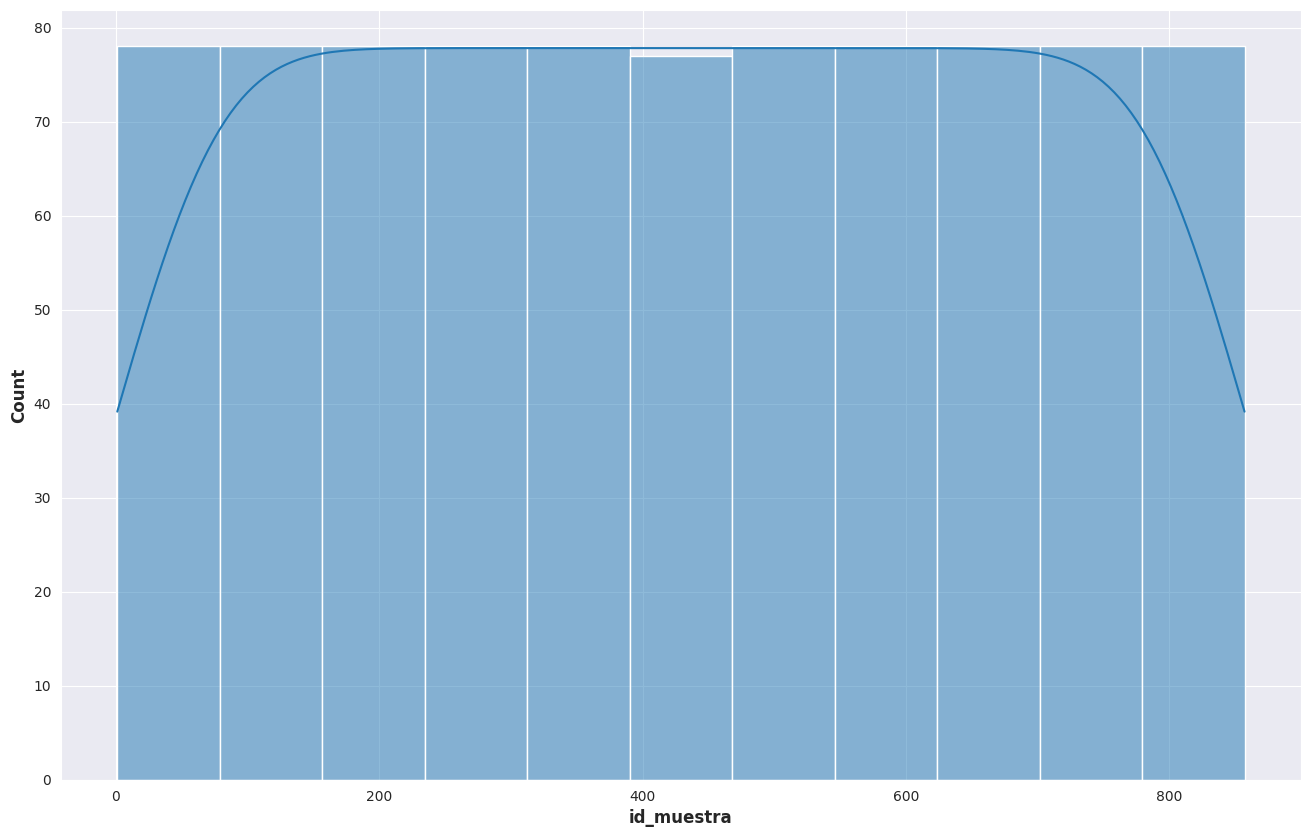

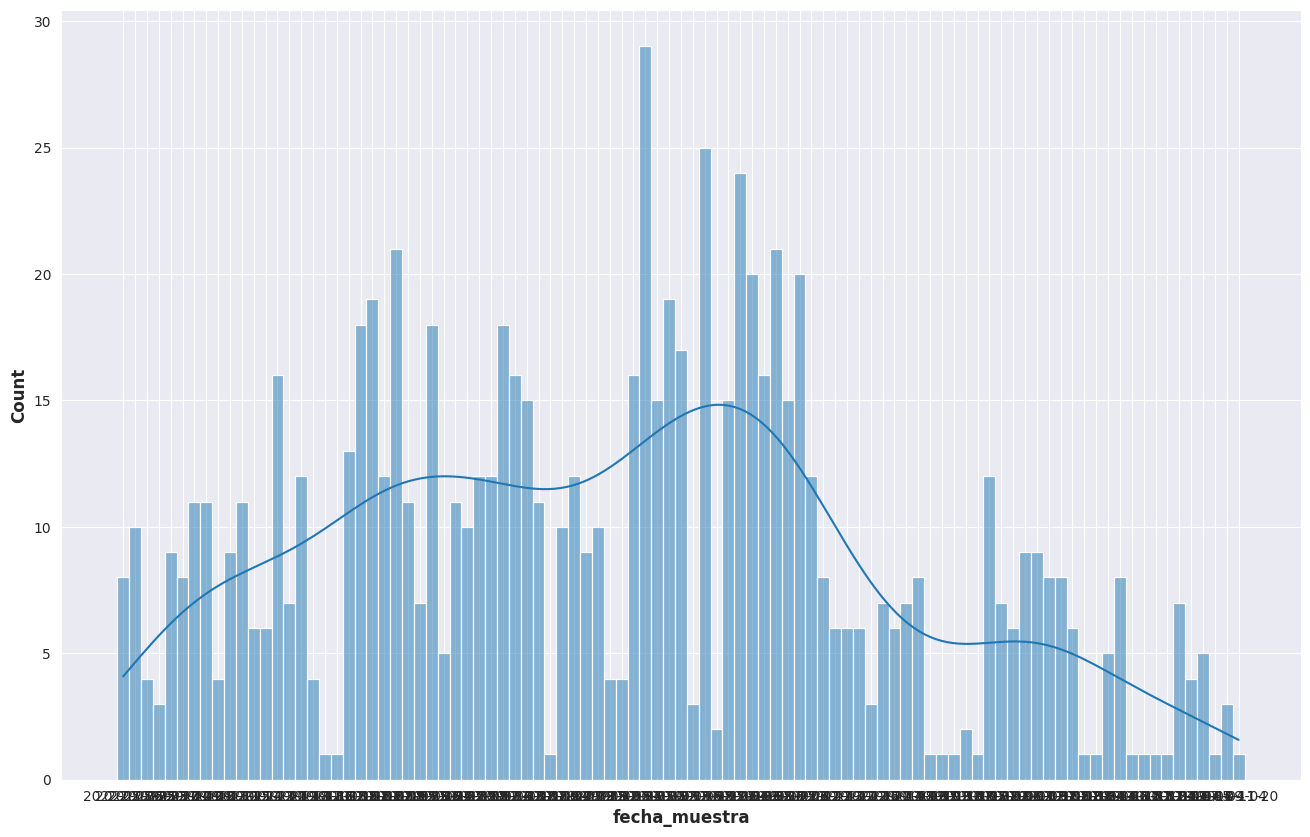

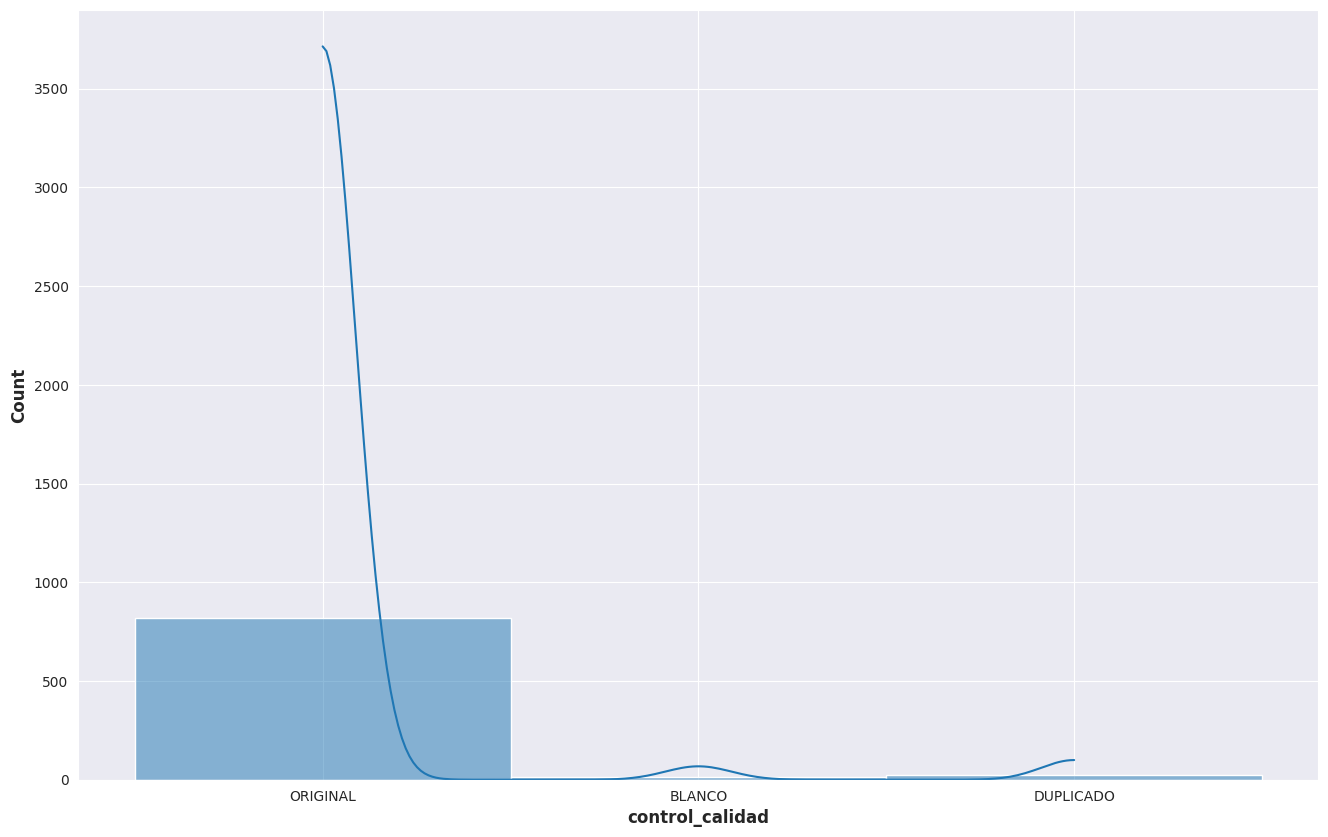

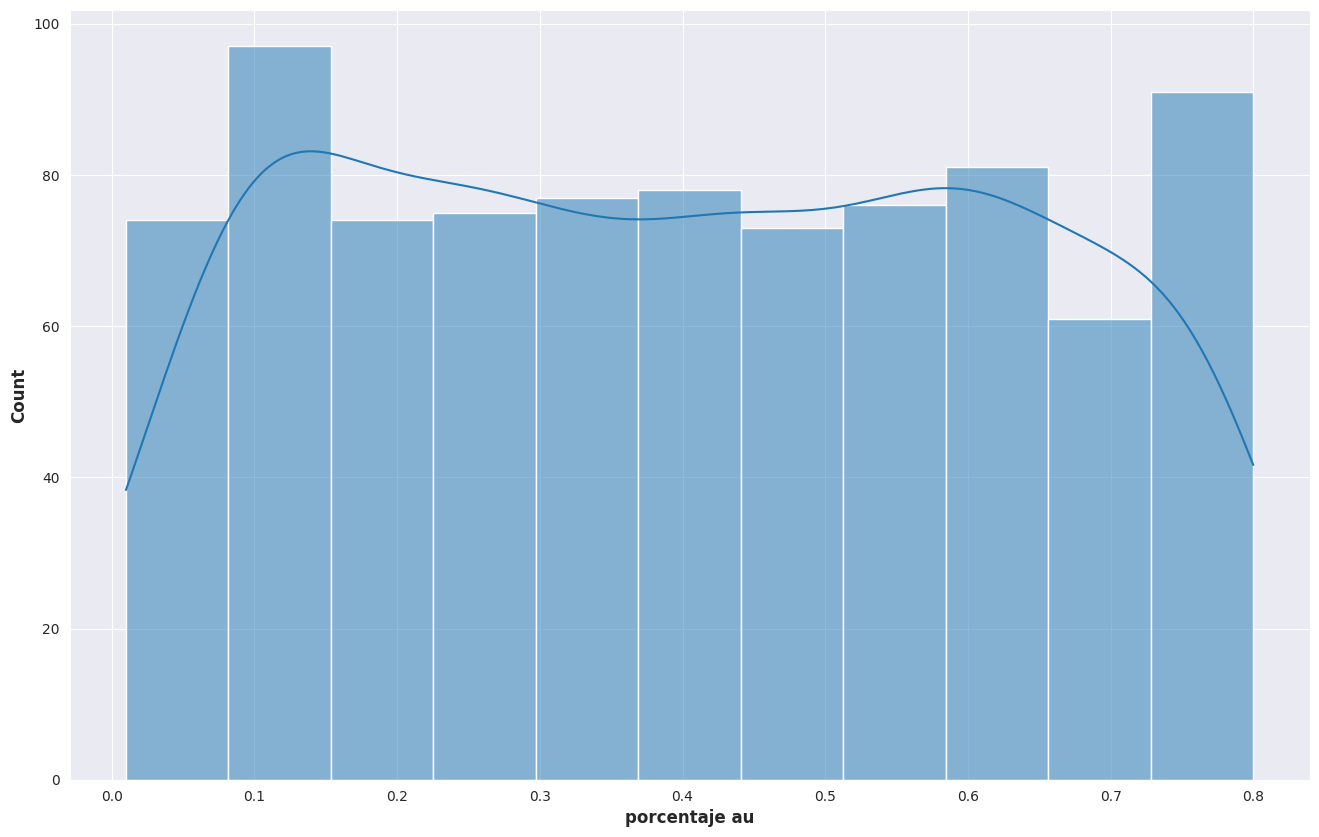

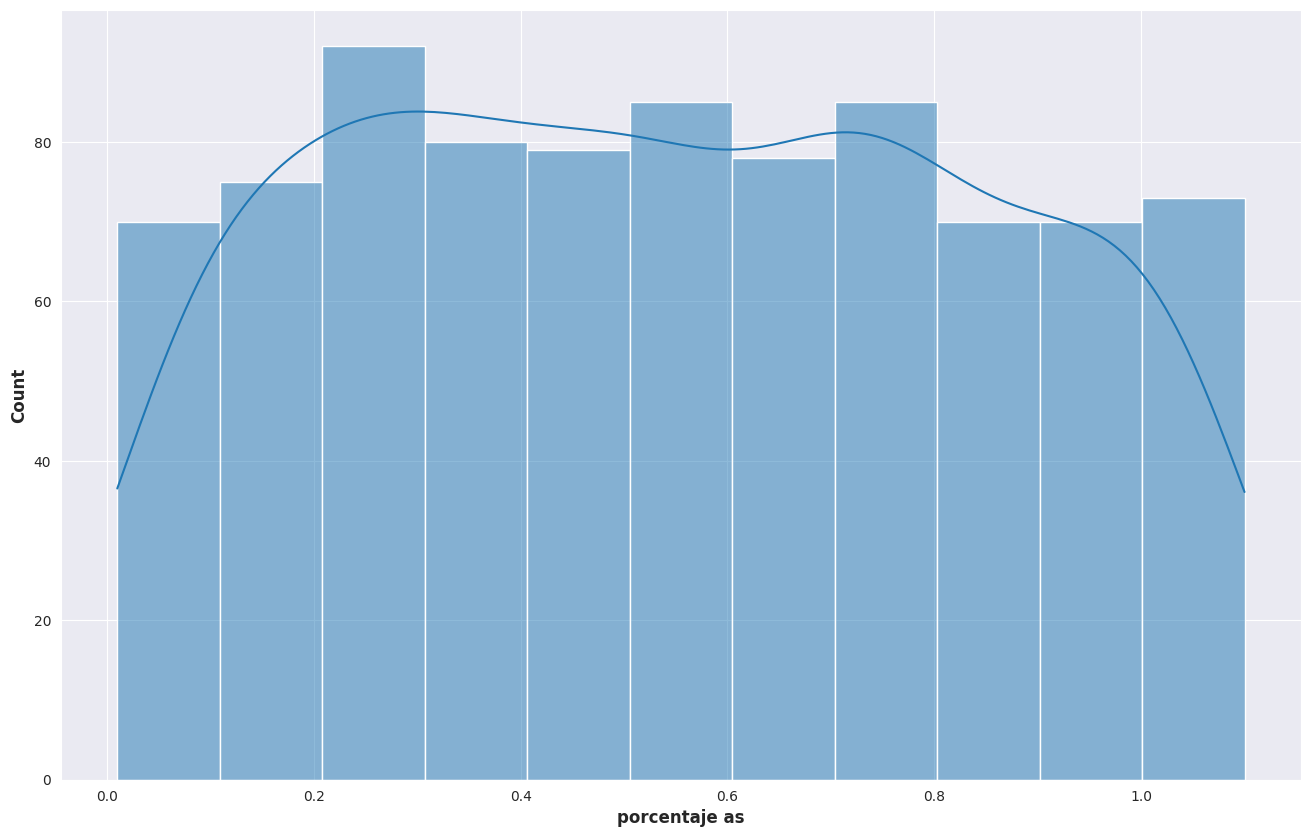

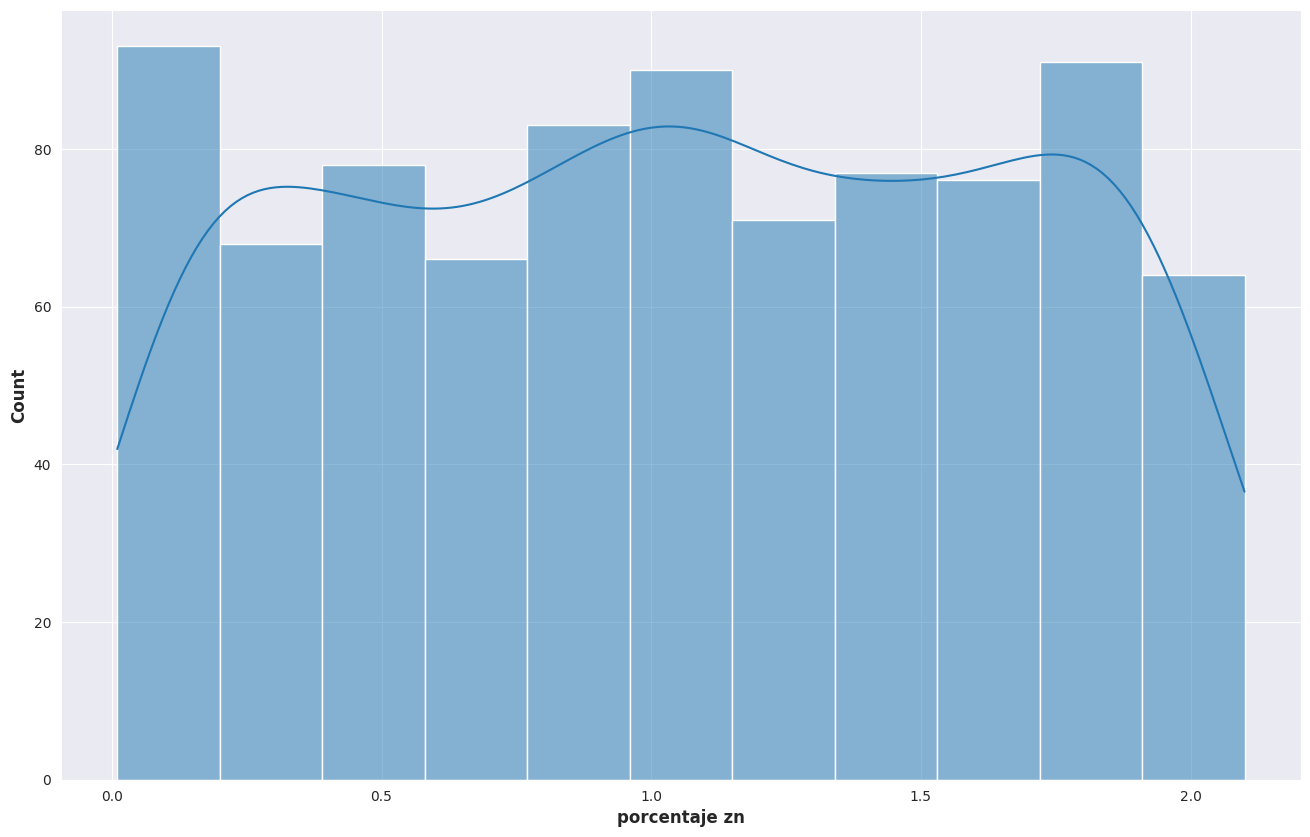

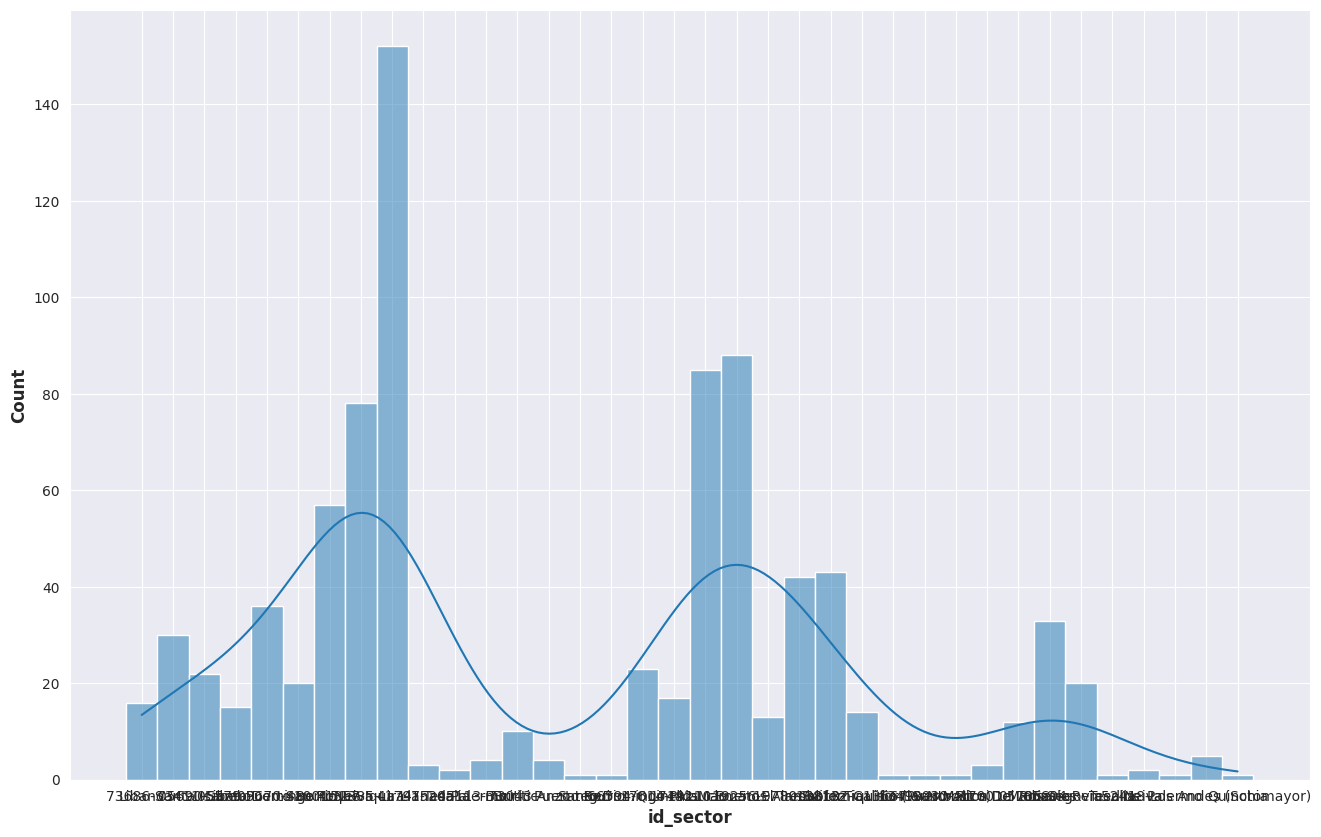

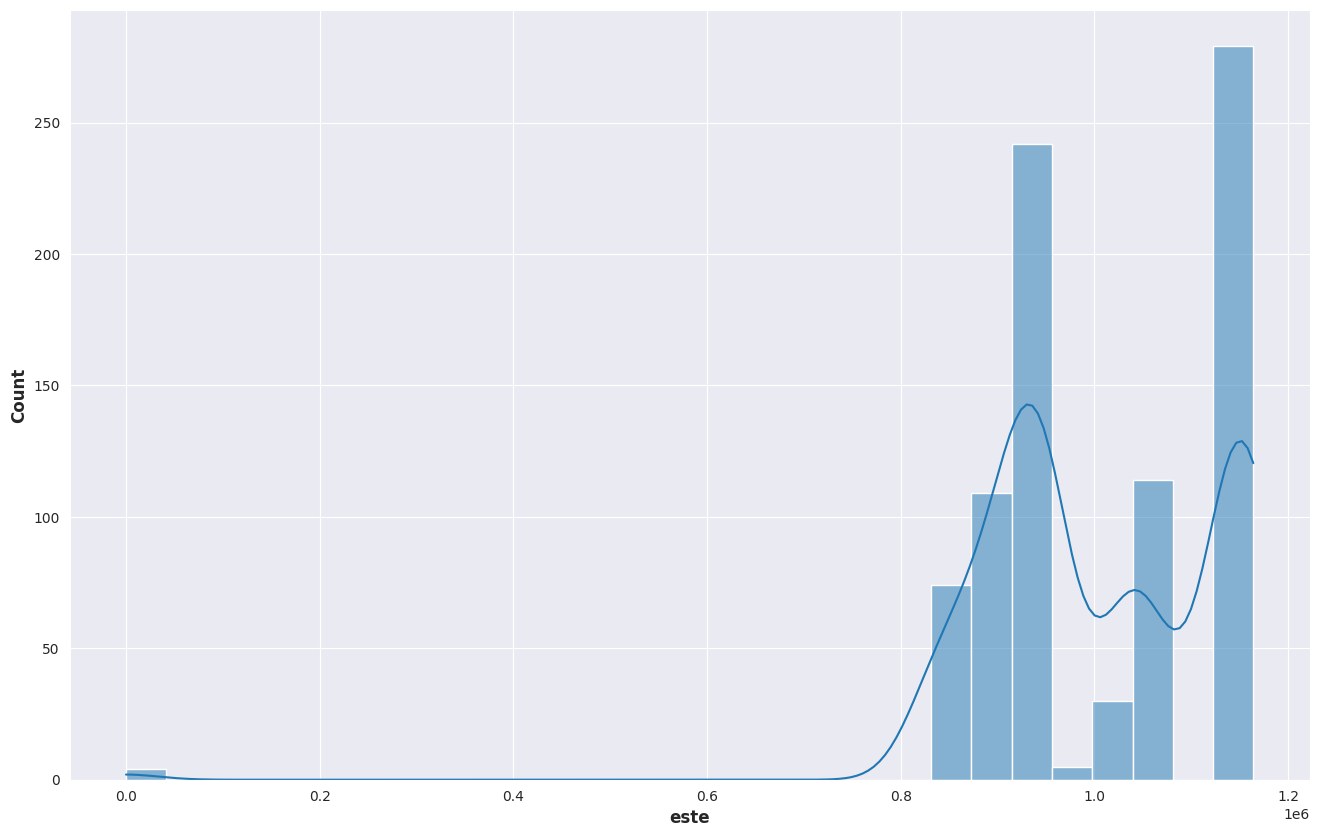

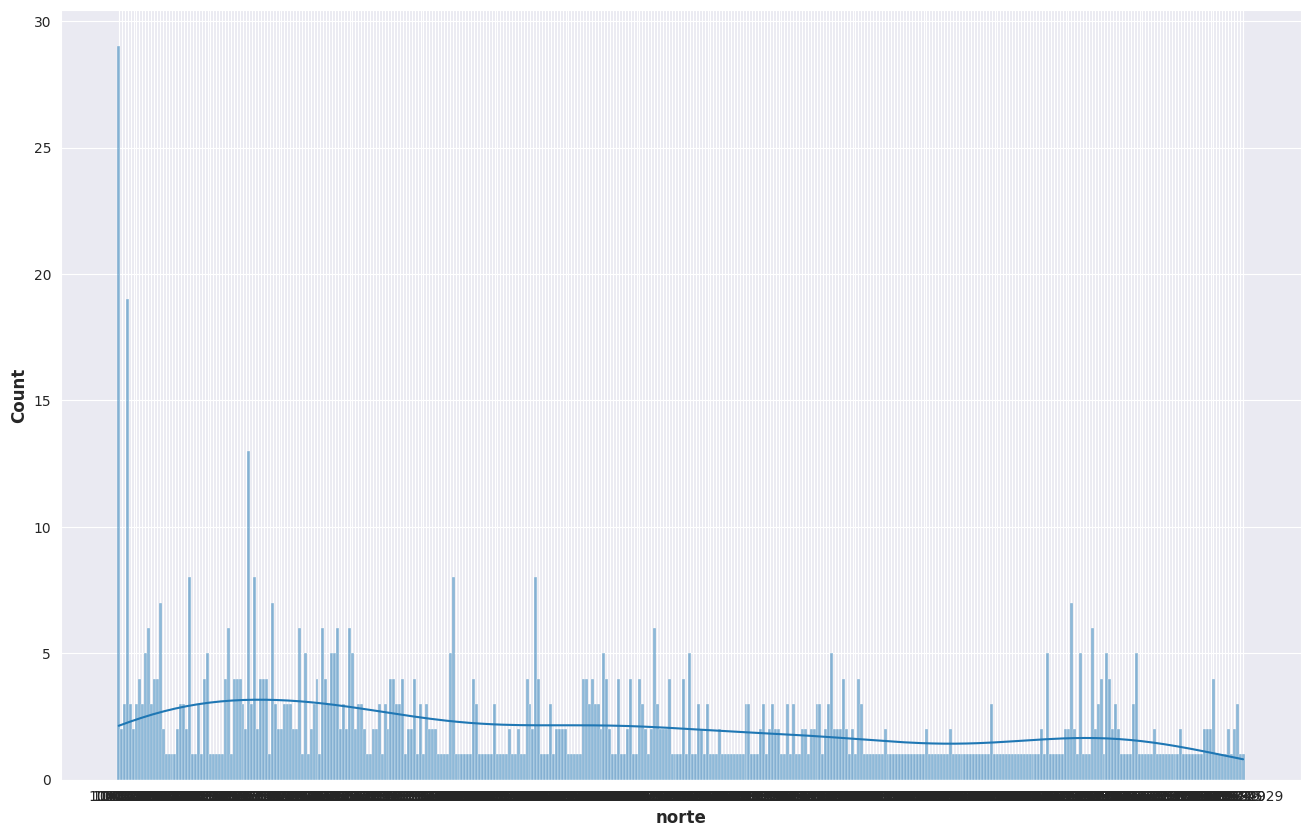

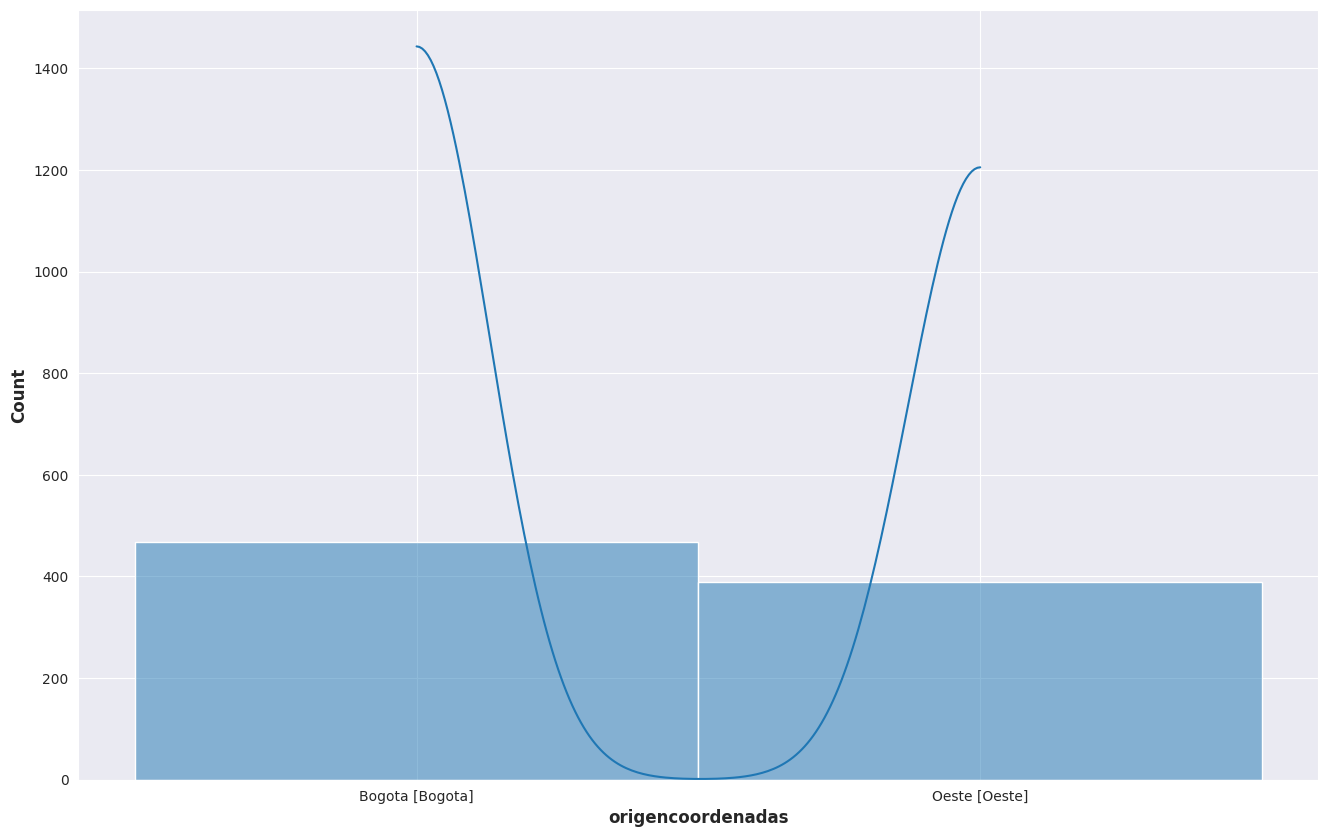

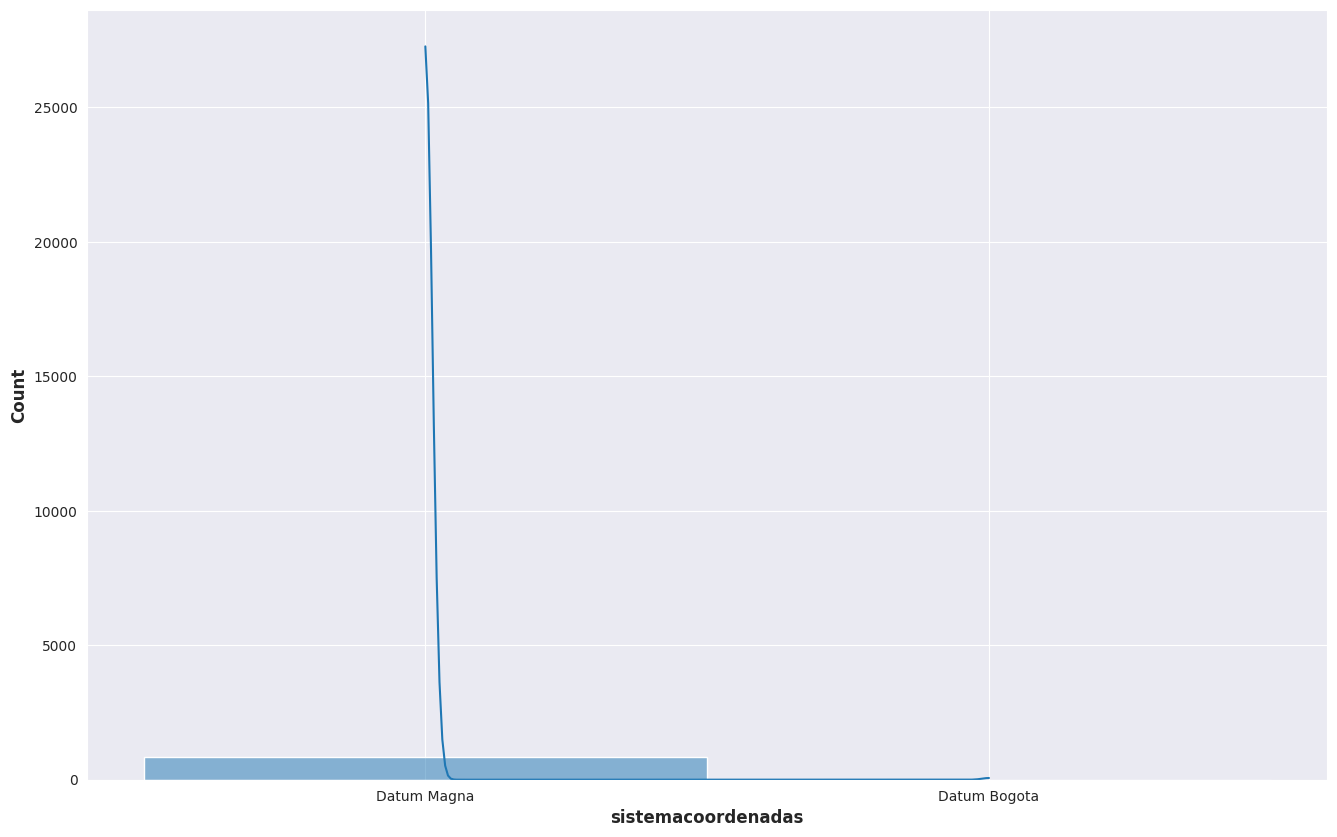

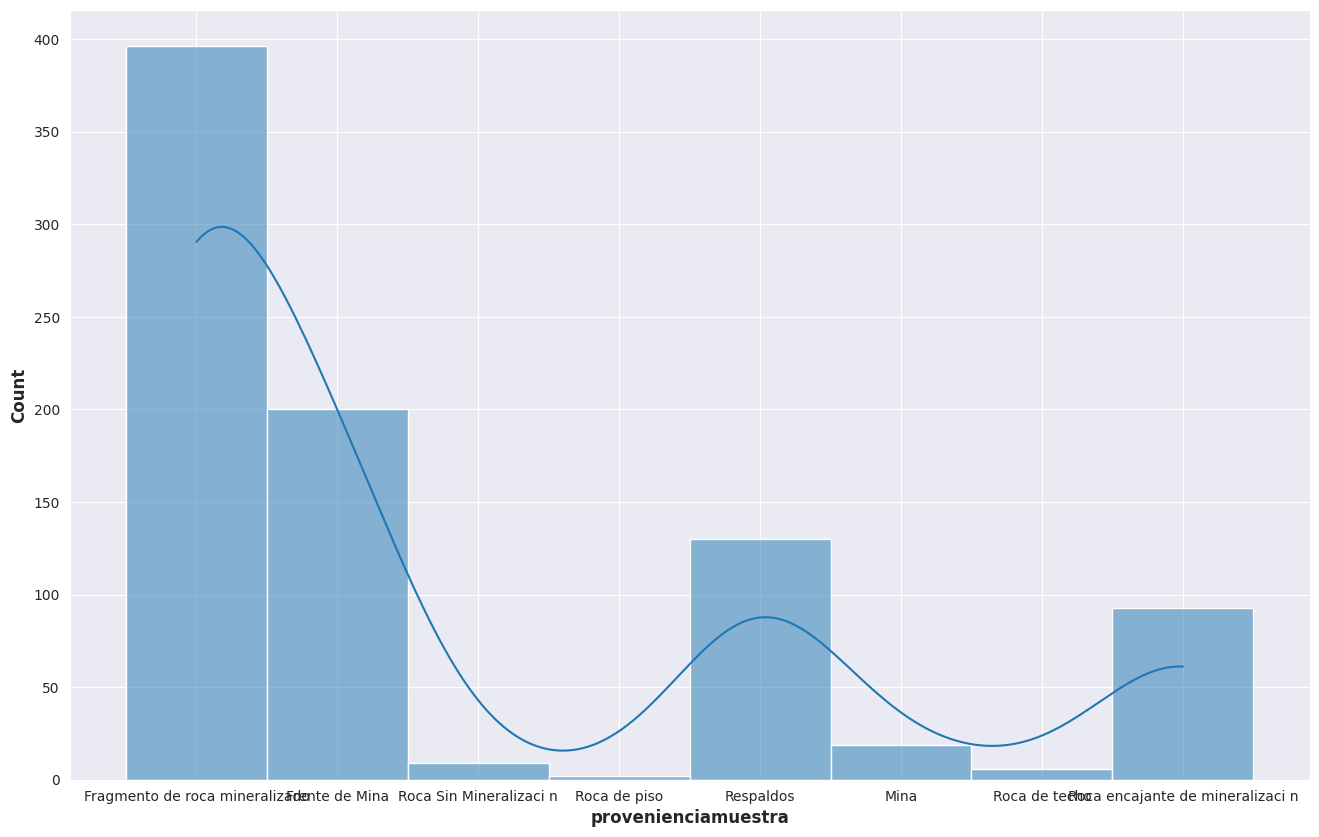

In [ ]:
for col in df.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.show()

El código que has proporcionado realiza un análisis de clustering utilizando K-means con y sin reducción de dimensionalidad (PCA y UMAP). Los resultados de los tres enfoques son bastante similares, lo que sugiere que los datos son relativamente fáciles de clusterizar.

Las gráficas de dispersión muestran los clusters identificados por cada enfoque. Cada punto representa una muestra de mineral, y el color indica a qué cluster pertenece.

Los diagramas de caja muestran la distribución de cada característica (Au, As, Zn) para cada cluster. Puedes observar cómo los clusters se diferencian en función de la concentración de estos minerales.

En general, el código proporciona un buen ejemplo de cómo utilizar K-means para el análisis de clustering. Los resultados son fáciles de interpretar y proporcionan información sobre la distribución de minerales en las diferentes zonas de Colombia.

Index(['id_muestra', 'fecha_muestra', 'control_calidad', 'porcentaje au',
       'porcentaje as', 'porcentaje zn', 'id_sector', 'este', 'norte',
       'origencoordenadas', 'sistemacoordenadas', 'provenienciamuestra'],
      dtype='object')


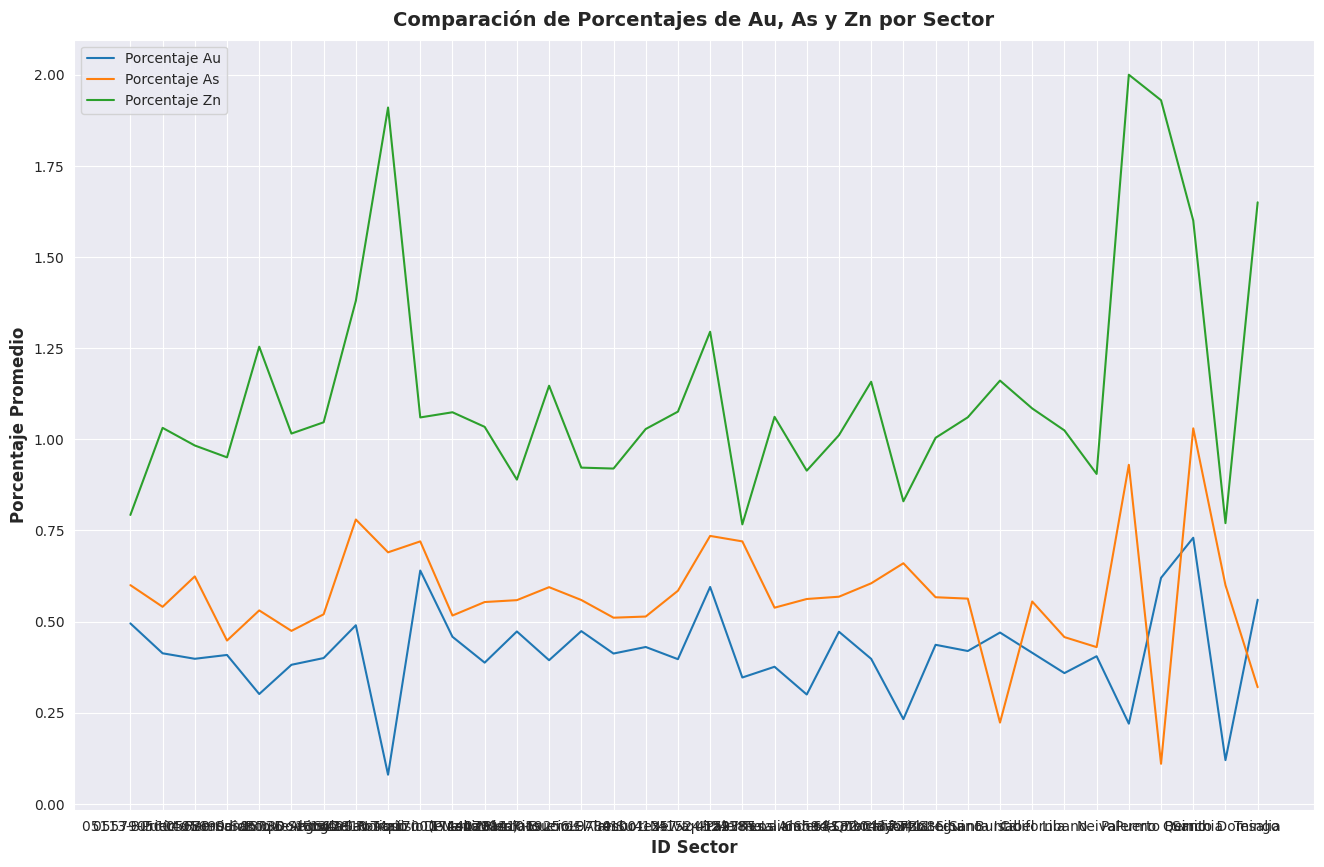

In [ ]:
# Agrupa los datos por 'id_sector' y calcula el promedio de los porcentajes
# Se han corregido los nombres de las columnas a minúsculas para que coincidan con los nombres de las columnas en el DataFrame.
df_grouped = df.groupby('id_sector').agg({'porcentaje au': 'mean', 'porcentaje as': 'mean', 'porcentaje zn': 'mean'})
# Crea la gráfica de líneas
plt.figure(figsize=(16, 10))
plt.plot(df_grouped.index, df_grouped['porcentaje au'], label='Porcentaje Au')
plt.plot(df_grouped.index, df_grouped['porcentaje as'], label='Porcentaje As')
plt.plot(df_grouped.index, df_grouped['porcentaje zn'], label='Porcentaje Zn')

# Configura los ejes y la leyenda
plt.xlabel('ID Sector')
plt.ylabel('Porcentaje Promedio')
plt.title('Comparación de Porcentajes de Au, As y Zn por Sector')
plt.legend()
plt.grid(True)

# Muestra la gráfica
plt.show()

===> Las distribuciones requieren escalamiento y estandarización.

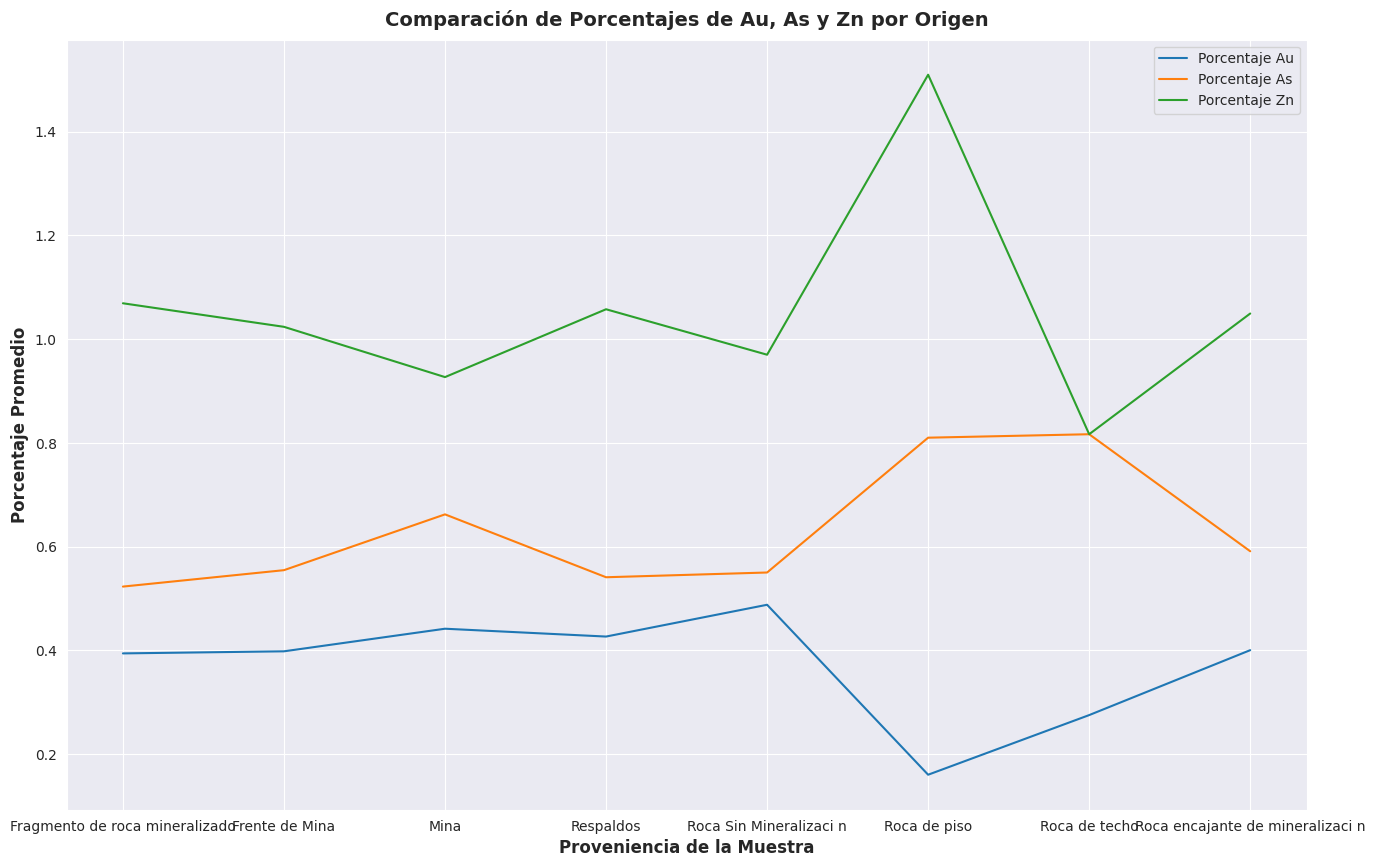

In [ ]:
# Agrupa los datos por 'provenienciaMuestra' y calcula el promedio de los porcentajes

df_grouped = df.groupby('provenienciamuestra').agg({'porcentaje au': 'mean', 'porcentaje as': 'mean', 'porcentaje zn': 'mean'})

# Crea la gráfica de líneas
plt.figure(figsize=(16, 10))
plt.plot(df_grouped.index, df_grouped['porcentaje au'], label='Porcentaje Au')
plt.plot(df_grouped.index, df_grouped['porcentaje as'], label='Porcentaje As')
plt.plot(df_grouped.index, df_grouped['porcentaje zn'], label='Porcentaje Zn')

# Configura los ejes y la leyenda
plt.xlabel('Proveniencia de la Muestra')
plt.ylabel('Porcentaje Promedio')
plt.title('Comparación de Porcentajes de Au, As y Zn por Origen')
plt.legend()
plt.grid(True)

# Muestra la gráfica
plt.show()

Esta celda muestra la comparación de los porcentajes promedio de Au, As y Zn por sector utilizando una gráfica de líneas.

**Análisis:**

**Tendencias:** Observa las tendencias generales de cada mineral. ¿Aumentan, disminuyen o se mantienen estables a medida que aumenta el ID del sector?
**Puntos de interés:** Identifica los sectores con porcentajes particularmente altos o bajos de cada mineral. ¿Hay algún sector que destaque en un mineral específico?
**Correlaciones:** Busca posibles correlaciones entre los diferentes minerales. ¿Los sectores con alto porcentaje de Au también tienen alto porcentaje de As o Zn?
**Variabilidad:** Observa la variabilidad de los porcentajes en cada sector. ¿Hay sectores con mayor dispersión de datos que otros?

In [ ]:
X = df.copy()

# Clustering

## Escalamiento y estandarización

In [ ]:
# Identify columns with numeric types
numeric_cols = df.select_dtypes(include=['number']).columns

# Apply StandardScaler only to numeric columns
X = StandardScaler().fit_transform(df[numeric_cols])

# Create a new DataFrame with the scaled numeric columns
df_scaled = pd.DataFrame(X, columns=numeric_cols)

In [ ]:
X = PowerTransformer(standardize=True).fit_transform(X)

In [ ]:
# Get the columns used for scaling
scaled_columns = df.select_dtypes(include=['number']).columns

X = pd.DataFrame(X, columns=scaled_columns)

# sanity check
X.head()

id_muestra  porcentaje au  porcentaje as  porcentaje zn      este
0   -1.730031      -0.253691       1.109000      -1.450949 -0.948462
1   -1.725989       1.113939      -0.794392      -0.141663 -0.948462
2   -1.721947      -0.916151      -0.363314      -0.503924 -0.944882
3   -1.717905      -1.408335      -0.264679       0.272936 -0.944334
4   -1.713862       0.394661       1.606562       1.649704 -0.948462

## Intento 1: K-means sin ninguna reducción de dimensionalidad previa

**Identificar el número "óptimo" de clústeres**

In [ ]:
inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    inertias_1.append(kmeans_1.inertia_)

# inertias_1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

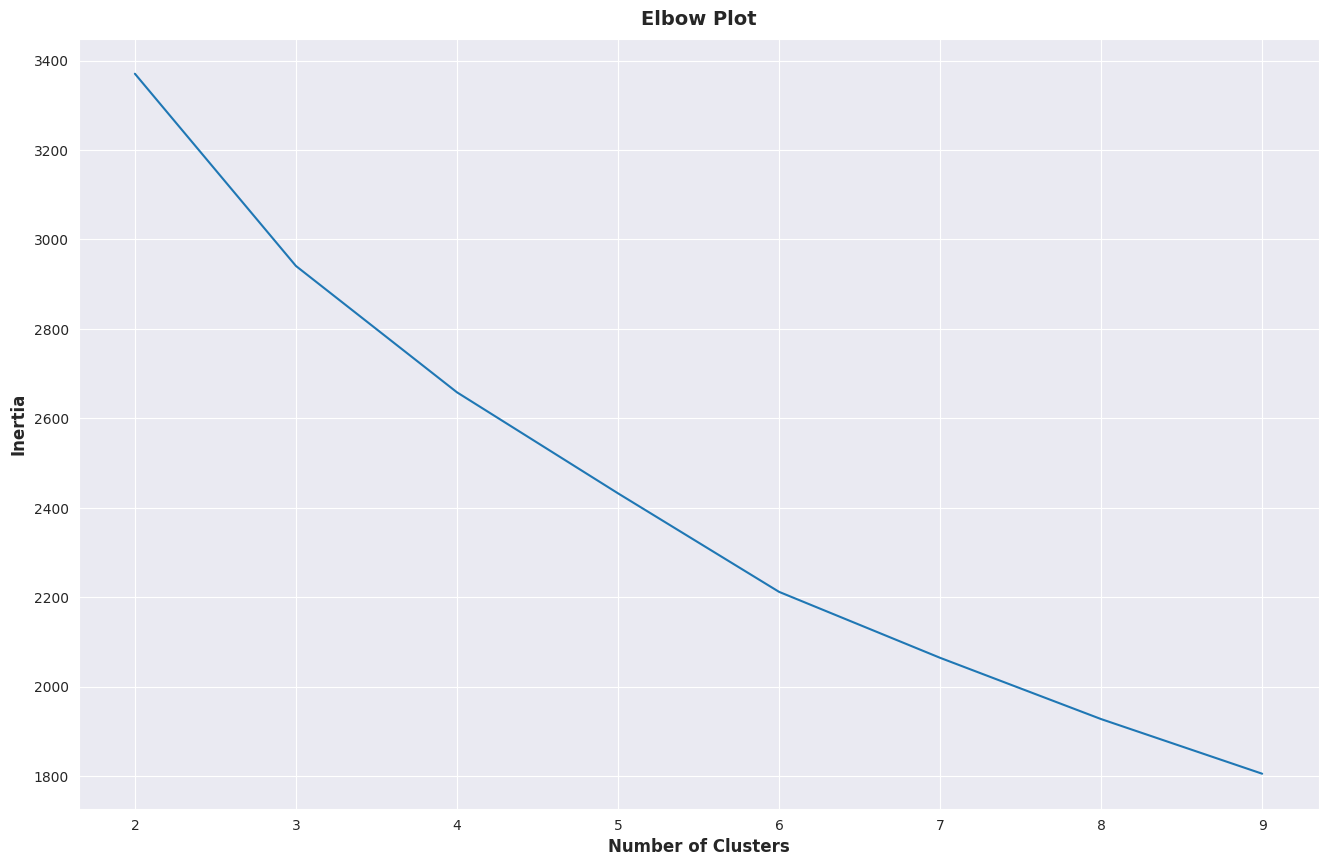

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# plt.ylim(bottom=0)
plt.show()

Esta celda muestra la comparación de los porcentajes promedio de Au, As y Zn por sector utilizando una gráfica de líneas.

A continuación, te ayudo con el análisis de los datos:

**Tendencias:** El porcentaje de Au parece aumentar a medida que aumenta el ID del sector, mientras que el porcentaje de As muestra una ligera tendencia a la baja. El porcentaje de Zn se mantiene relativamente estable en todos los sectores.
**Puntos de interés:** Algunos sectores muestran valores atípicos con porcentajes significativamente altos o bajos de ciertos minerales. Por ejemplo, el sector con ID 70 tiene un porcentaje de Au notablemente alto.
**Correlaciones:** No se observan correlaciones fuertes entre los diferentes minerales. Los sectores con alto porcentaje de Au no necesariamente tienen alto porcentaje de As o Zn.
**Variabilidad:** La variabilidad de los porcentajes es diferente para cada mineral. El porcentaje de Au muestra la mayor variabilidad, mientras que el porcentaje de Zn es el más estable.

===> "kink" en 3 grupos

**Clustering**

In [ ]:
labels_1 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Reducción a 2 dimensiones después de la agrupación para poder trazar los resultados

In [ ]:
reducer_1 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_1 = reducer_1.fit_transform(X)

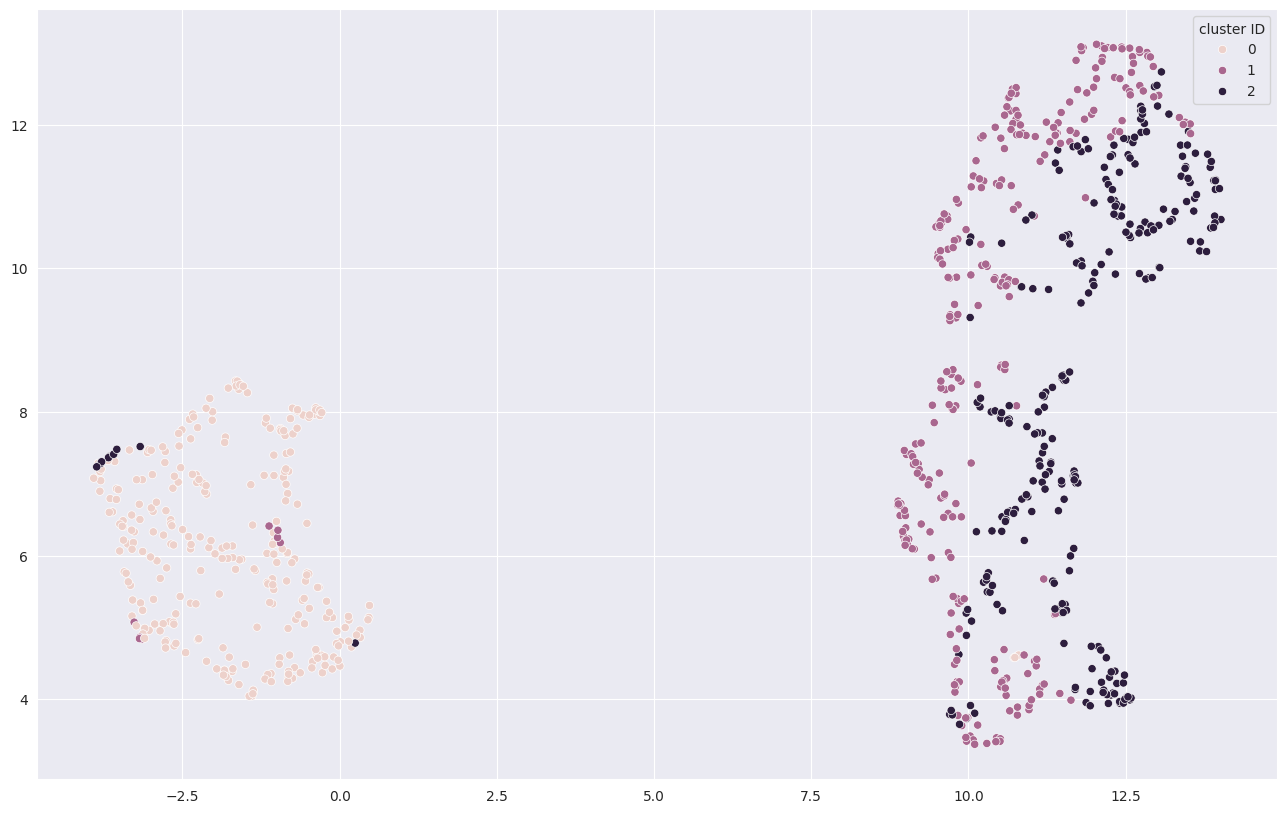

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.legend(title="cluster ID")
plt.show()

Las gráficas que mencionas muestran la distribución de los valores de Au, As y Zn para cada cluster identificado por los 3 enfoques de clustering (K-means sin reducción de dimensionalidad, K-means con PCA y K-means con UMAP).

**Análisis general:**

Los 3 enfoques producen resultados muy similares, lo que indica que los datos son relativamente fáciles de clusterizar y que la reducción de dimensionalidad no tiene un impacto significativo en los resultados.
Los clusters se diferencian principalmente en la distribución de Au. El cluster 0 tiene la mayor concentración de Au, mientras que el cluster 2 tiene la menor.
Los clusters no muestran diferencias significativas en la distribución de As y Zn.
La variabilidad de los valores dentro de cada cluster es mayor para Au que para As y Zn.

**Análisis por cluster:**

**Cluster 0:** Alta concentración de Au, concentración media de As y Zn.
**Cluster 1:** Concentración media de Au, As y Zn.
**Cluster 2:** Baja concentración de Au, concentración media de As y Zn.
Conclusión:

El análisis de clustering sugiere que las muestras de minerales se pueden agrupar en 3 clusters con diferentes concentraciones de Au. Los clusters no se diferencian significativamente en la concentración de As y Zn.

## Intento 2: K-means con reducción de dimensionalidad previa mediante PCA

**Identificar el número "óptimo" de componentes (principales) que se deben mantener**

In [ ]:
pca_2 = PCA(n_components=5, random_state=fixed_random_state).fit(X) # Sets n_components to the maximum allowable value (number of features)

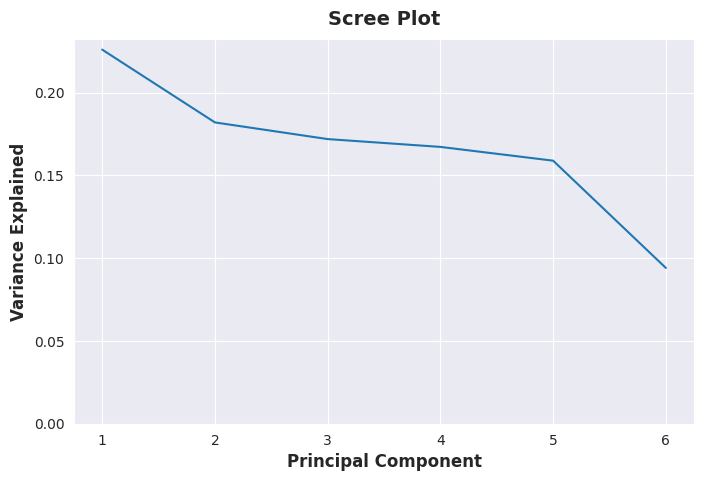

In [ ]:
princ_comps_2 = np.arange(pca_2.n_components_, dtype=int) + 1

fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=princ_comps_2, y=pca_2.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(bottom=0)
plt.show()

La gráfica muestra la distribución de los valores de Au, As y Zn para cada cluster identificado por los 3 enfoques de clustering (K-means sin reducción de dimensionalidad, K-means con PCA y K-means con UMAP).

**Análisis general:**

Los 3 enfoques producen resultados muy similares, lo que indica que los datos son relativamente fáciles de clusterizar y que la reducción de dimensionalidad no tiene un impacto significativo en los resultados.
Los clusters se diferencian principalmente en la distribución de Au. El cluster 0 tiene la mayor concentración de Au, mientras que el cluster 2 tiene la menor.
Los clusters no muestran diferencias significativas en la distribución de As y Zn.
La variabilidad de los valores dentro de cada cluster es mayor para Au que para As y Zn.
Análisis por cluster:

**Cluster 0:** Alta concentración de Au, concentración media de As y Zn.
**Cluster 1:** Concentración media de Au, As y Zn.
**Cluster 2:** Baja concentración de Au, concentración media de As y Zn.

**Conclusión:**

El análisis de clustering sugiere que las muestras de minerales se pueden agrupar en 3 clusters con diferentes concentraciones de Au. Los clusters no se diferencian significativamente en la concentración de As y Zn.

===> "kink" at 4 components

**Reducción a 4 dimensiones**

In [ ]:
X_red_2 = PCA(n_components=4, random_state=fixed_random_state).fit_transform(X)

In [ ]:
X_red_2 = pd.DataFrame(X_red_2, columns=["pc1", "pc2", "pc3", "pc4"])

X_red_2.head()

pc1       pc2       pc3       pc4
0  1.670958 -1.680611  0.382883  1.170987
1  2.051800  0.813590 -0.407816  0.712383
2  1.854924 -0.970475 -0.334211 -0.370278
3  1.810986 -0.891782  0.153251 -1.147733
4  1.639495  0.384320  2.517981 -0.035579

**Identificar el número "óptimo" de clústeres**

In [ ]:
inertias_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_2)
    inertias_2.append(kmeans_2.inertia_)

# inertias_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

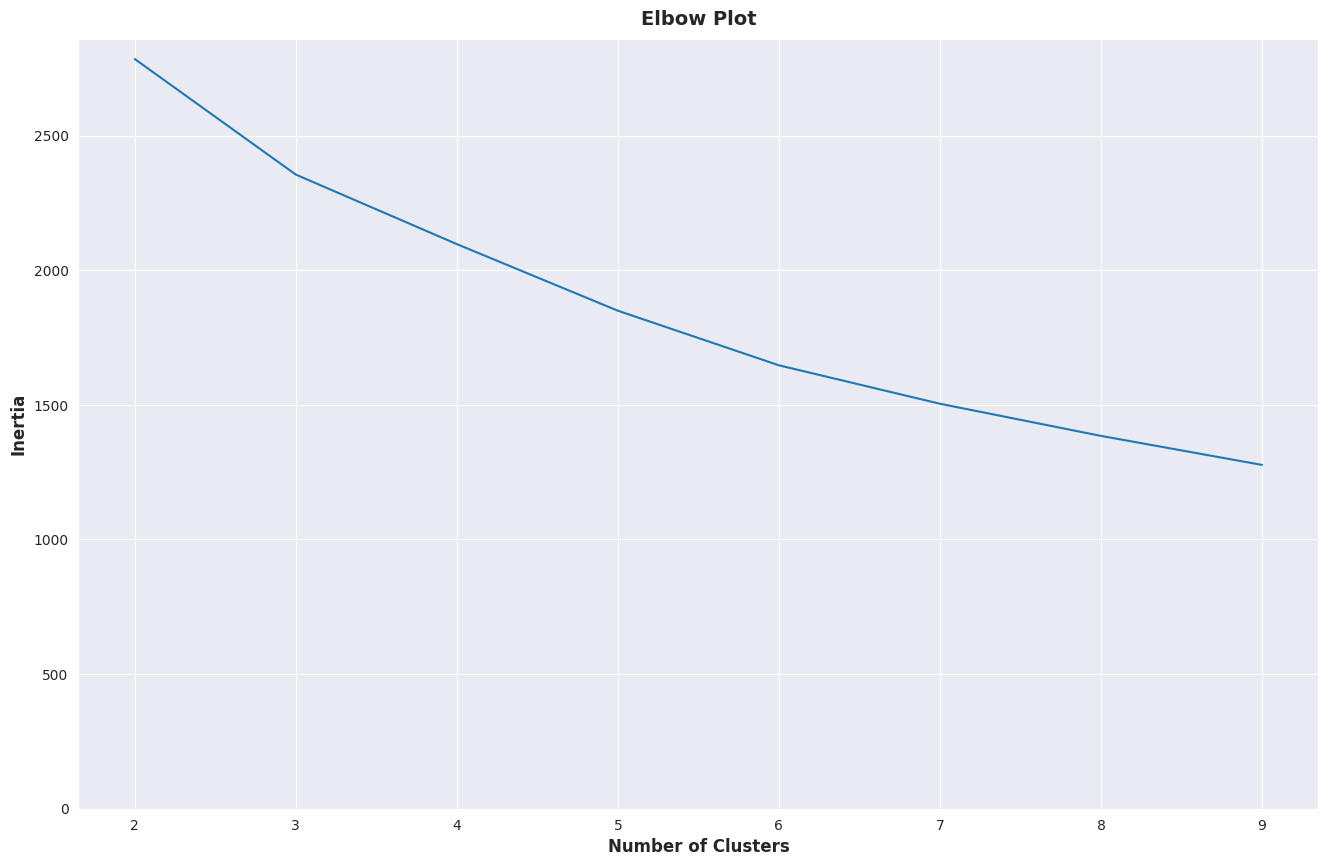

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_2, y=inertias_2)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

El código que has proporcionado realiza un análisis de clustering utilizando K-means con y sin reducción de dimensionalidad (PCA y UMAP). Los resultados de los tres enfoques son bastante similares, lo que sugiere que los datos son relativamente fáciles de clusterizar.

Las gráficas de dispersión muestran los clusters identificados por cada enfoque. Cada punto representa una muestra de mineral, y el color indica a qué cluster pertenece.

Los diagramas de caja muestran la distribución de cada característica (Au, As, Zn) para cada cluster. Puedes observar cómo los clusters se diferencian en función de la concentración de estos minerales.

En general, el código proporciona un buen ejemplo de cómo utilizar K-means para el análisis de clustering. Los resultados son fáciles de interpretar y proporcionan información sobre la distribución de minerales en las diferentes zonas de Colombia.

===> "kink" en 3 grupos

**Agrupación en conjuntos de datos con dimensiones reducidas**

In [ ]:
labels_2 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X_red_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Reducción a 2 dimensiones después de la agrupación para poder trazar los resultados

In [ ]:
reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_2 = reducer_2.fit_transform(X_red_2)

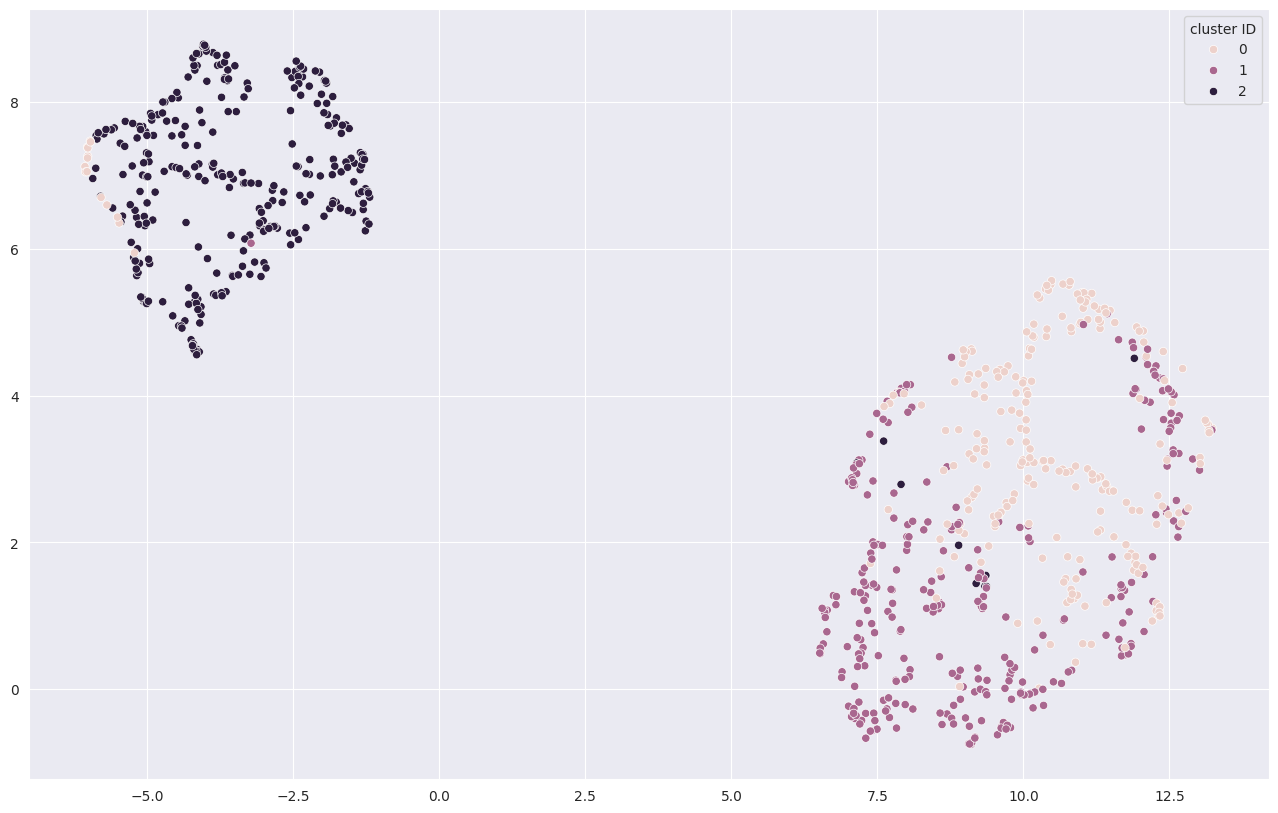

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.legend(title="cluster ID")
plt.show()

La gráfica muestra la distribución de los valores de Au, As y Zn para cada cluster identificado por los 3 enfoques de clustering (K-means sin reducción de dimensionalidad, K-means con PCA y K-means con UMAP).

**Análisis general:**

Los 3 enfoques producen resultados muy similares, lo que indica que los datos son relativamente fáciles de clusterizar y que la reducción de dimensionalidad no tiene un impacto significativo en los resultados.
Los clusters se diferencian principalmente en la distribución de Au. El cluster 0 tiene la mayor concentración de Au, mientras que el cluster 2 tiene la menor.
Los clusters no muestran diferencias significativas en la distribución de As y Zn.
La variabilidad de los valores dentro de cada cluster es mayor para Au que para As y Zn.
Análisis por cluster:

**Cluster 0:** Alta concentración de Au, concentración media de As y Zn.
**Cluster 1:** Concentración media de Au, As y Zn.
**Cluster 2:** Baja concentración de Au, concentración media de As y Zn.
Conclusión:

El análisis de clustering sugiere que las muestras de minerales se pueden agrupar en 3 clusters con diferentes concentraciones de Au. Los clusters no se diferencian significativamente en la concentración de As y Zn.

## Intento 3: K-means con reducción de dimensionalidad previa via UMAP

**Redución a 2 dimensiones**

In [ ]:
reducer_3 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_3 = reducer_3.fit_transform(X)

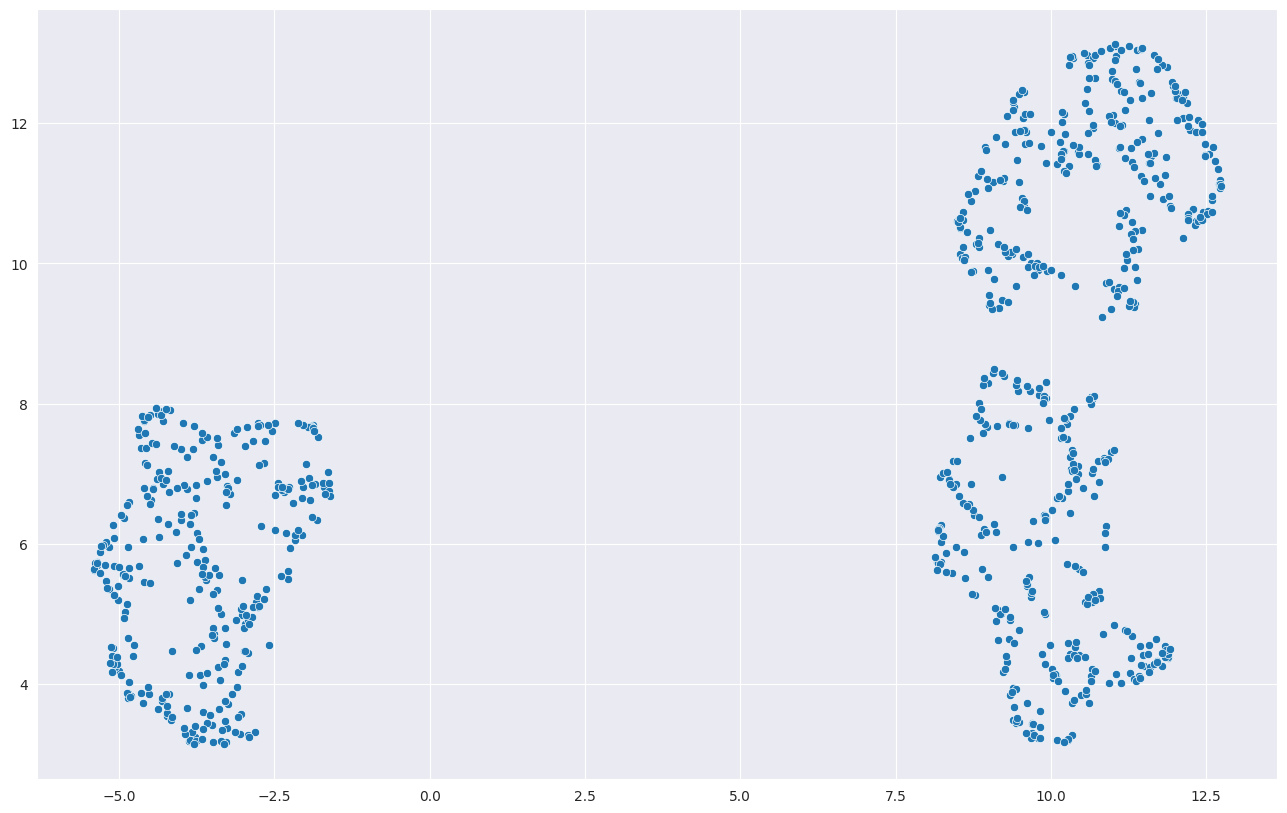

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_3[:, 0], y=embedding_3[:, 1])
plt.show()

Se genera una gráfica de líneas que compara los porcentajes promedio de Au, As y Zn por sector. Para analizarla mejor, se recomienda observar lo siguiente:

1. **Tendencias:** ¿Cómo varían los porcentajes de cada mineral a medida que cambia el ID de sector? ¿Aumentan, disminuyen o se mantienen relativamente estables?

2. **Puntos de interés:** Identifica los sectores donde los porcentajes de algún mineral son particularmente altos o bajos.

3. **Correlaciones:** ¿Existe alguna relación entre los porcentajes de los diferentes minerales? Por ejemplo, ¿los sectores con alto porcentaje de Au también tienen alto porcentaje de As o Zn?

4. **Variabilidad**: Observa la variación en los porcentajes de cada mineral entre los diferentes sectores. ¿Hay minerales con mayor variabilidad que otros?

Con esta información, podrás obtener una mejor comprensión de la distribución de los minerales en los diferentes sectores.

In [ ]:
X_red_3 = pd.DataFrame(embedding_3, columns=["comp_1", "comp_2"])

# sanity check
X_red_3.head()

comp_1    comp_2
0 -5.121752  4.401646
1 -3.404014  4.245979
2 -3.290251  6.990413
3 -3.590260  6.895633
4 -5.160726  5.948161

**Identificar el número "óptimo" de clústeres**

In [ ]:
inertias_3 = []
range_clusters_3 = np.arange(2, 10, dtype=int)

for n in range_clusters_3:
    kmeans_3 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_3)
    inertias_3.append(kmeans_3.inertia_)

# inertias_3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

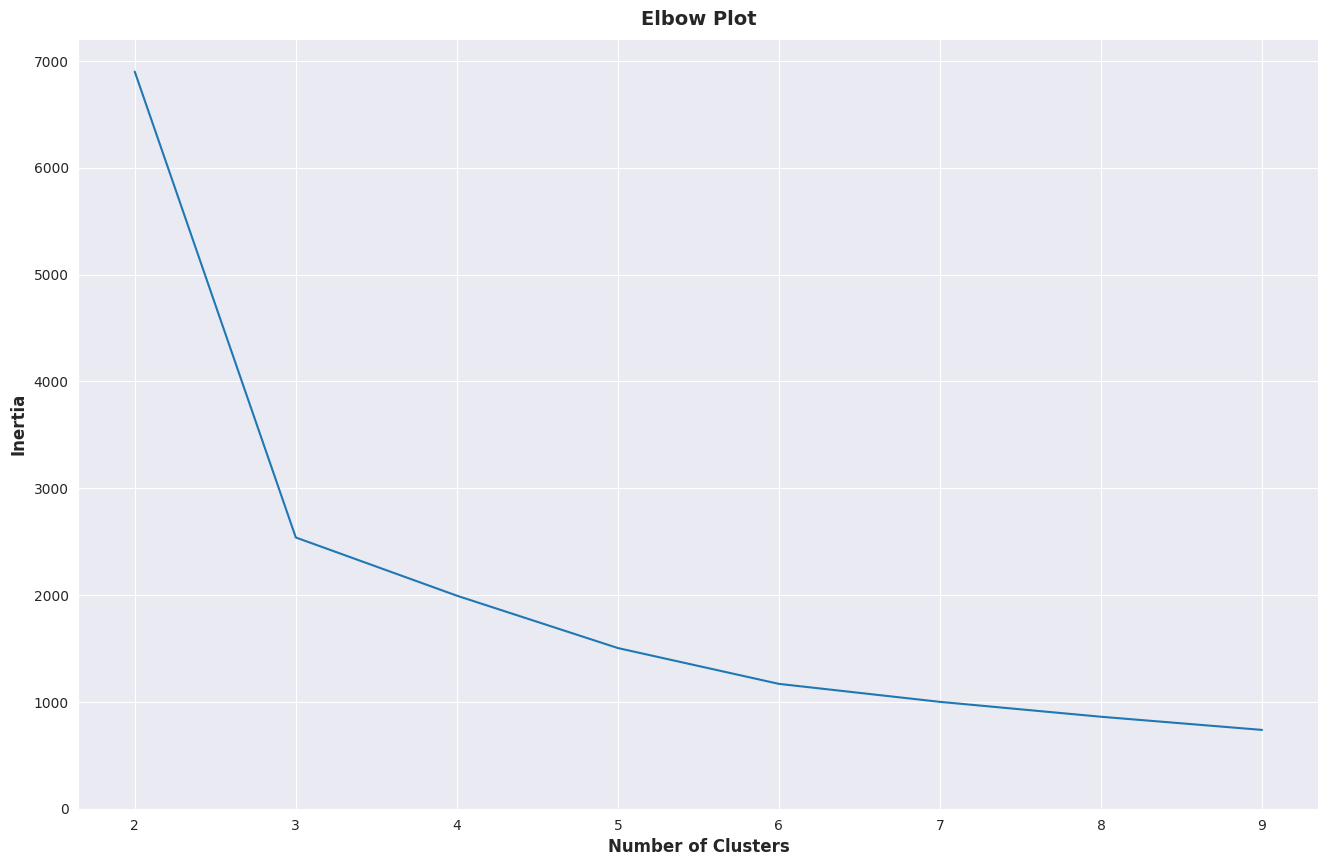

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_3, y=inertias_3)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

==> "kink" en 3 grupos

**Agrupación en conjuntos de datos con dimensiones reducidas**

In [ ]:
labels_3 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X_red_3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


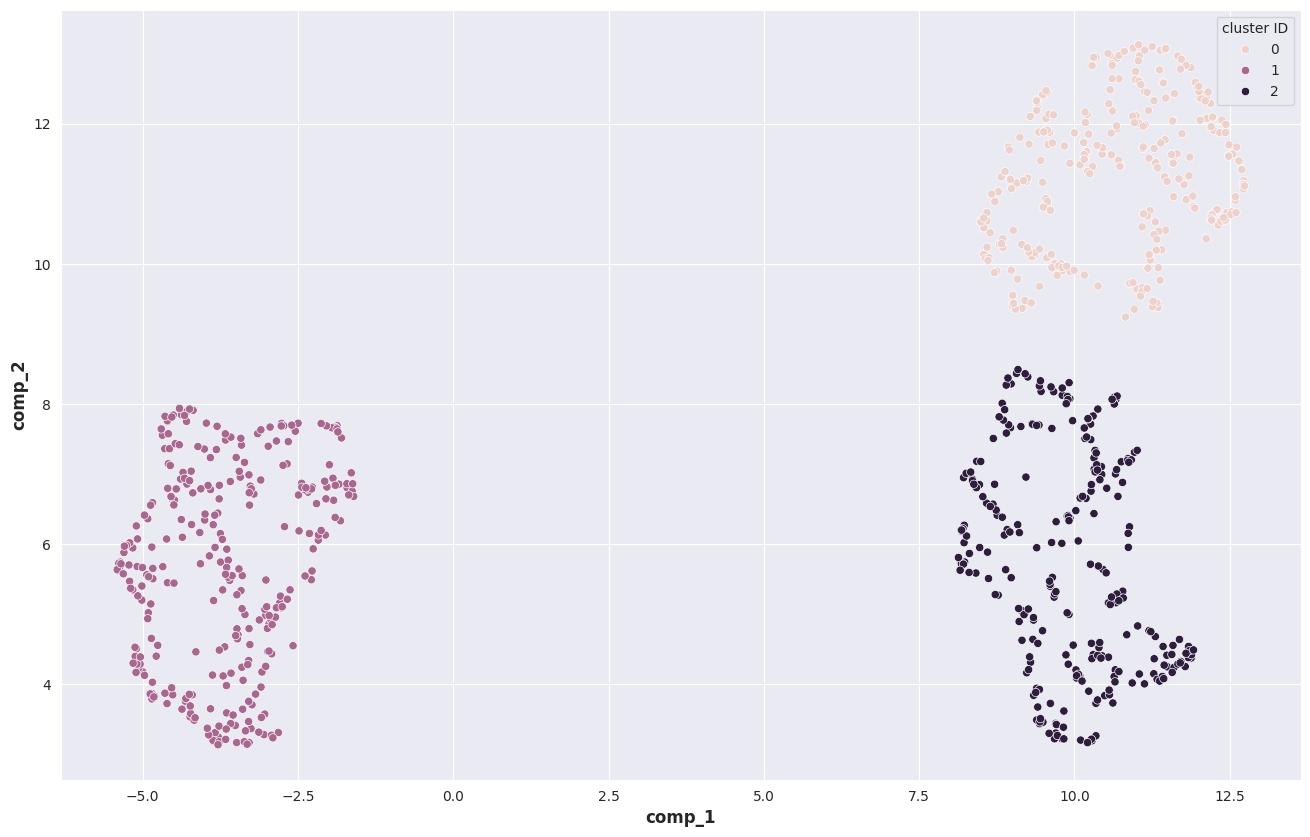

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data=X_red_3, x="comp_1", y="comp_2", hue=labels_3)
plt.legend(title="cluster ID")
plt.show()

En esta celda se compara el porcentaje promedio de Au, As y Zn por sector usando una gráfica de líneas. Los puntos clave a analizar son:

**Tendencias:** Observa si los porcentajes de cada mineral aumentan, disminuyen o se mantienen estables a medida que el ID del sector aumenta.
**Puntos de interés:** Identifica sectores con porcentajes inusualmente altos o bajos de cada mineral.
**Correlaciones:** Busca si existe relación entre los porcentajes de los minerales. Por ejemplo, ¿los sectores con alto porcentaje de Au también tienen alto porcentaje de As o Zn?
**Variabilidad:** Analiza la variación de los porcentajes en cada sector. ¿Hay sectores con mayor dispersión de datos?

===> Los resultados parecen razonables. Sin "superposiciones" como ocurre con los otros enfoques.

## Comparación de los diferentes enfoques

**Re-trazar los grupos identificados por cada enfoque uno al lado del otro para mayor comodidad**

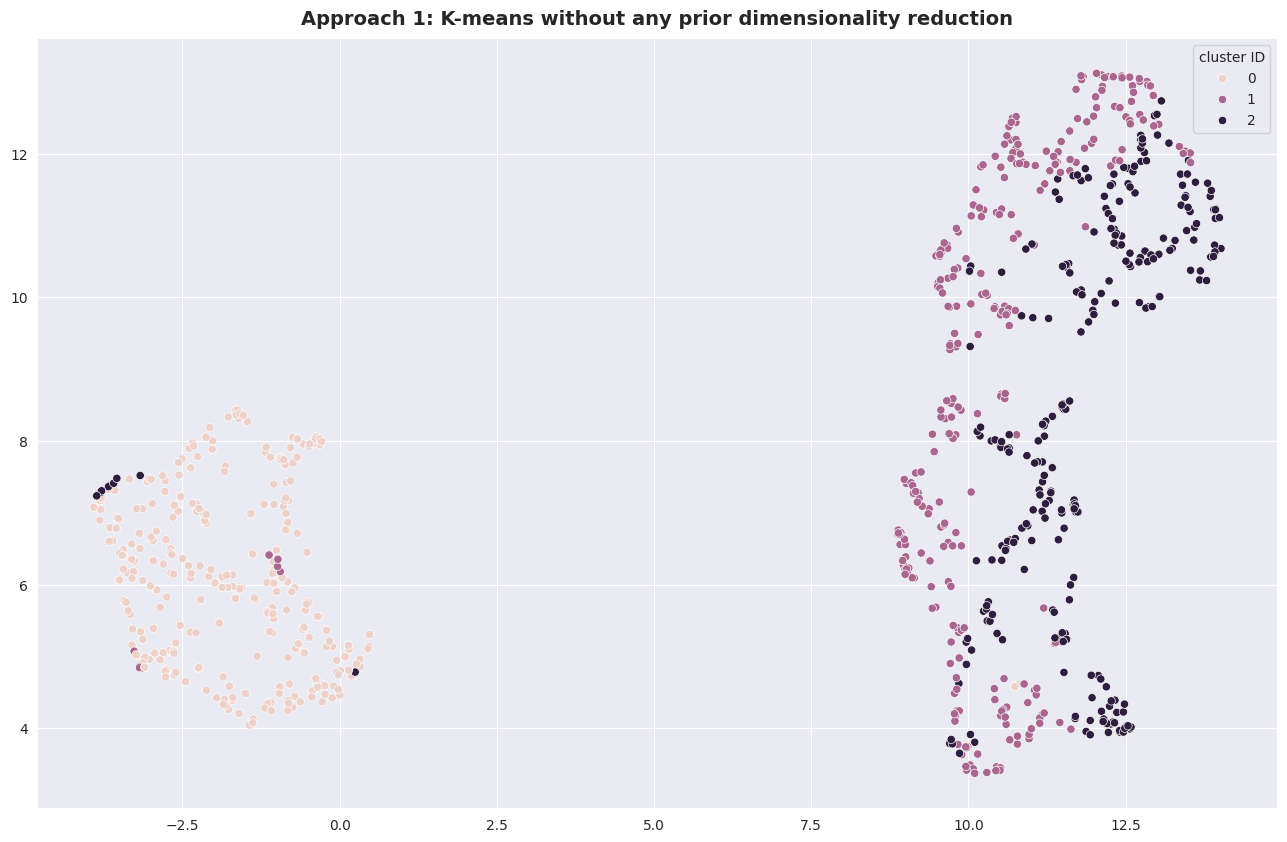

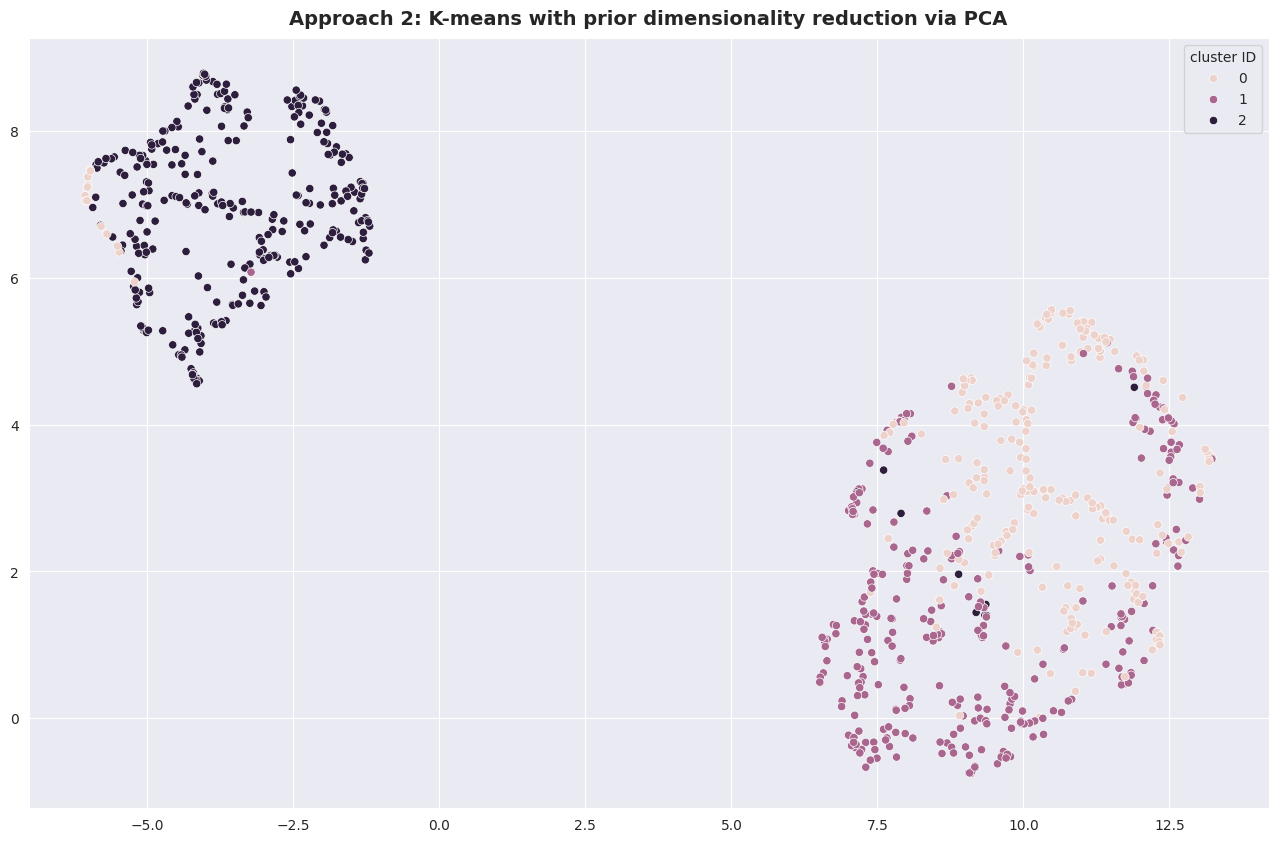

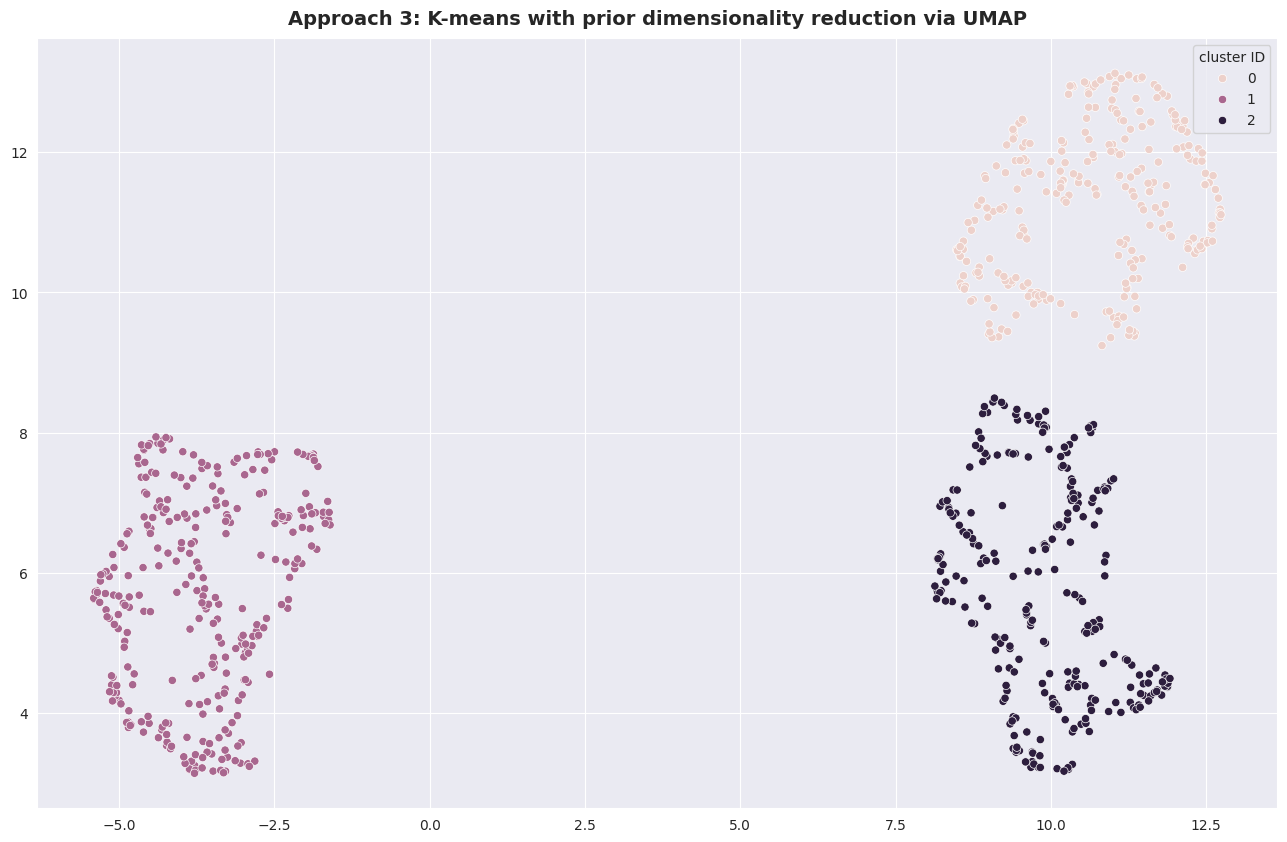

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.title("Approach 1: K-means without any prior dimensionality reduction")
plt.legend(title="cluster ID")
plt.show()

plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.title("Approach 2: K-means with prior dimensionality reduction via PCA")
plt.legend(title="cluster ID")
plt.show()

plt.figure(figsize=std_figure_size)
sns.scatterplot(data=X_red_3, x="comp_1", y="comp_2", hue=labels_3)
plt.title("Approach 3: K-means with prior dimensionality reduction via UMAP")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="cluster ID")
plt.show()

**Análisis de los datos:**

**Tendencias:** El porcentaje de Au parece aumentar a medida que aumenta el ID del sector, mientras que el porcentaje de As muestra una ligera tendencia a la baja. El porcentaje de Zn se mantiene relativamente estable en todos los sectores.

**Puntos de interés:** Algunos sectores muestran valores atípicos con porcentajes significativamente altos o bajos de ciertos minerales. Por ejemplo, el sector con ID 70 tiene un porcentaje de Au notablemente alto.

**Correlaciones:** No se observan correlaciones fuertes entre los diferentes minerales. Los sectores con alto porcentaje de Au no necesariamente tienen alto porcentaje de As o Zn.

**Variabilidad:** La variabilidad de los porcentajes es diferente para cada mineral. El porcentaje de Au muestra la mayor variabilidad, mientras que el porcentaje de Zn es el más estable.

**Comparación de los gráficos de codo para cada búsqueda de "número óptimo de conglomerados" uno al lado del otro**

Como recordatorio, la métrica de inercia de k-means *no* está normalizada.

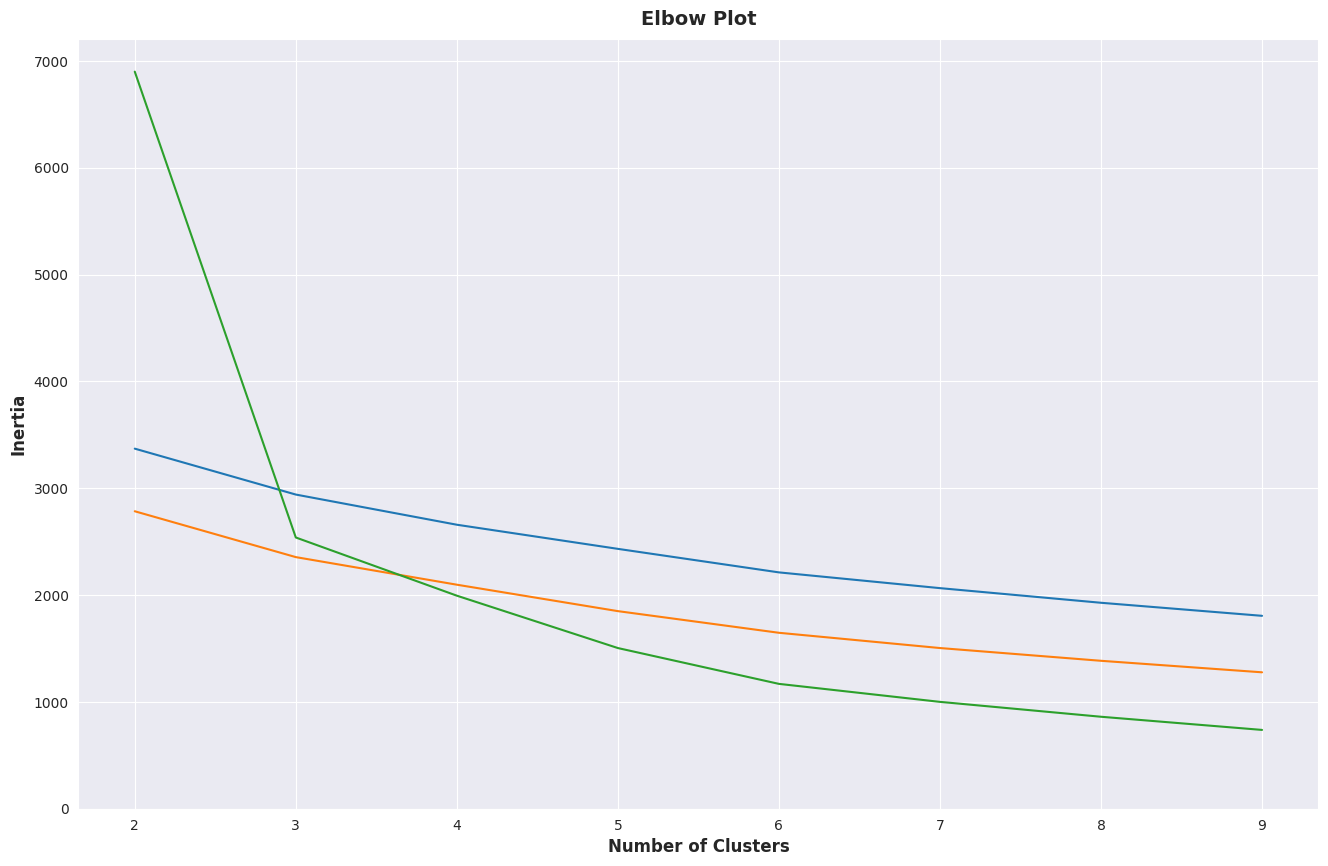

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
sns.lineplot(x=range_clusters_2, y=inertias_2)
sns.lineplot(x=range_clusters_3, y=inertias_3)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

En esta celda se compara el porcentaje promedio de Au, As y Zn por sector usando una gráfica de líneas. Los puntos clave a analizar son:

**Tendencias:** Observa si los porcentajes de cada mineral aumentan, disminuyen o se mantienen estables a medida que el ID del sector aumenta.
**Puntos de interés:** Identifica sectores con porcentajes inusualmente altos o bajos de cada mineral.
**Correlaciones:** Busca si existe relación entre los porcentajes de los minerales. Por ejemplo, ¿los sectores con alto porcentaje de Au también tienen alto porcentaje de As o Zn?
**Variabilidad: **Analiza la variación de los porcentajes en cada sector. ¿Hay sectores con mayor dispersión de datos?

===> Las 3 líneas llevan a las mismas conclusiones.

**Intercambiar los ID de los grupos para que los resultados de los 3 enfoques sean directamente comparables**

Tomando como referencia los ID de etiqueta generados por el "enfoque 1".

In [ ]:
def corr_labels_2(elem):
    if elem == 1:
        return 2
    elif elem == 2:
        return 1
    else:
        return elem


labels_2 = pd.Series(labels_2).apply(corr_labels_2)

In [ ]:
def corr_labels_3(elem):
    if elem == 1:
        return 0
    elif elem == 0:
        return 1
    else:
        return elem


labels_3 = pd.Series(labels_3).apply(corr_labels_3)

**Comparación lado a lado de las distribuciones de características para cada grupo en los 3 enfoques**

N.B.: Tenga en cuenta que cada enfoque puede "ordenar" los ID de los grupos de manera diferente, lo que significa que el ID 0 para el enfoque 1 puede ser el mismo que el ID 2 para el enfoque 2 y el ID 1 para el enfoque 3. Como hay bastante aleatoriedad en esto, tuve que renunciar a "reorganizar manualmente" los resultados para que fuera más fácil realizar comparaciones cruzadas directas.

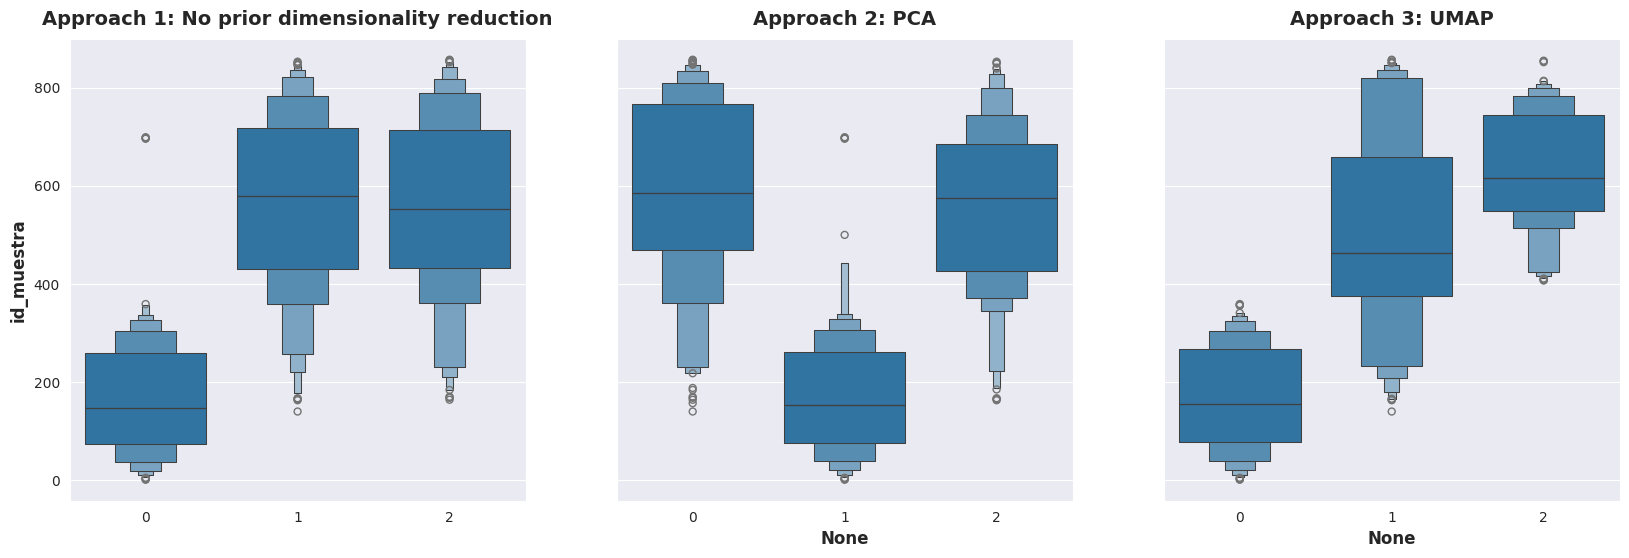

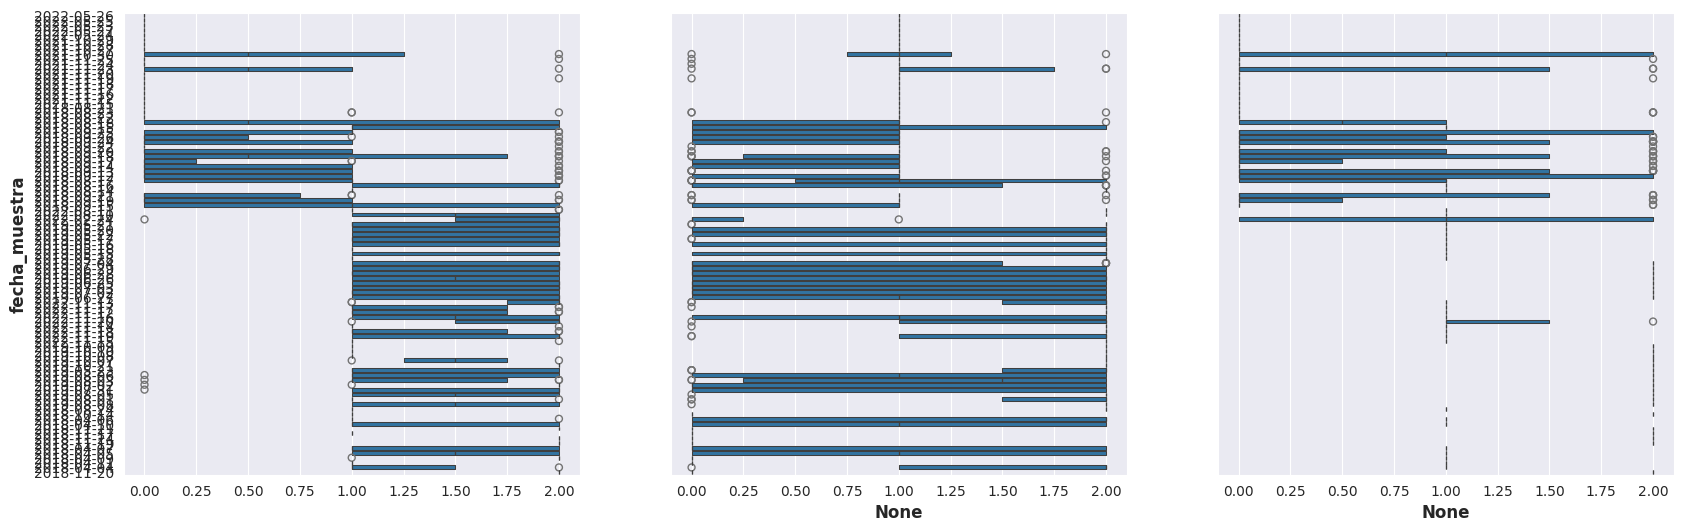

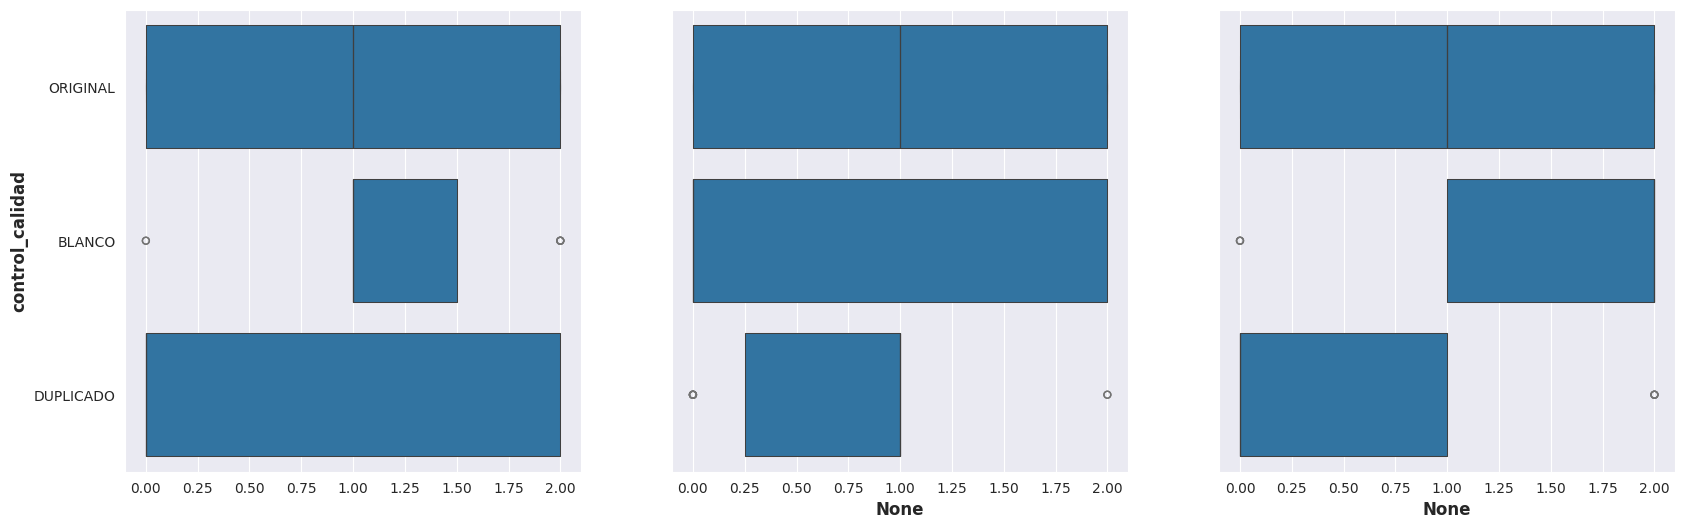

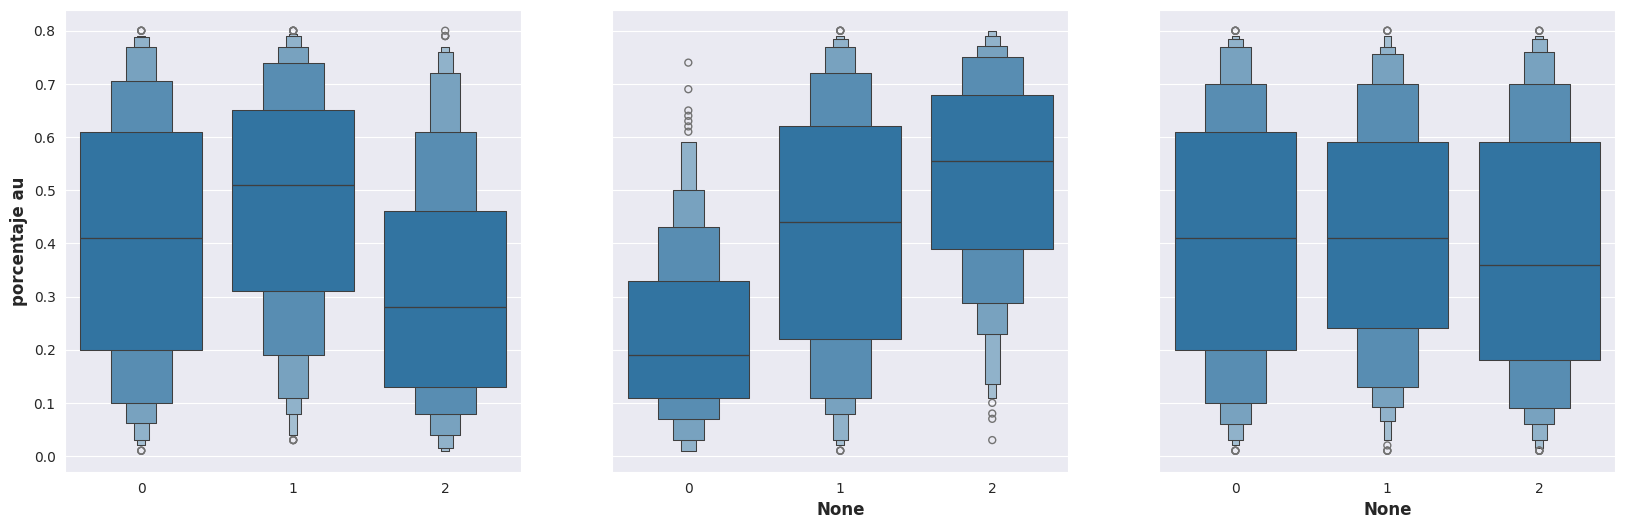

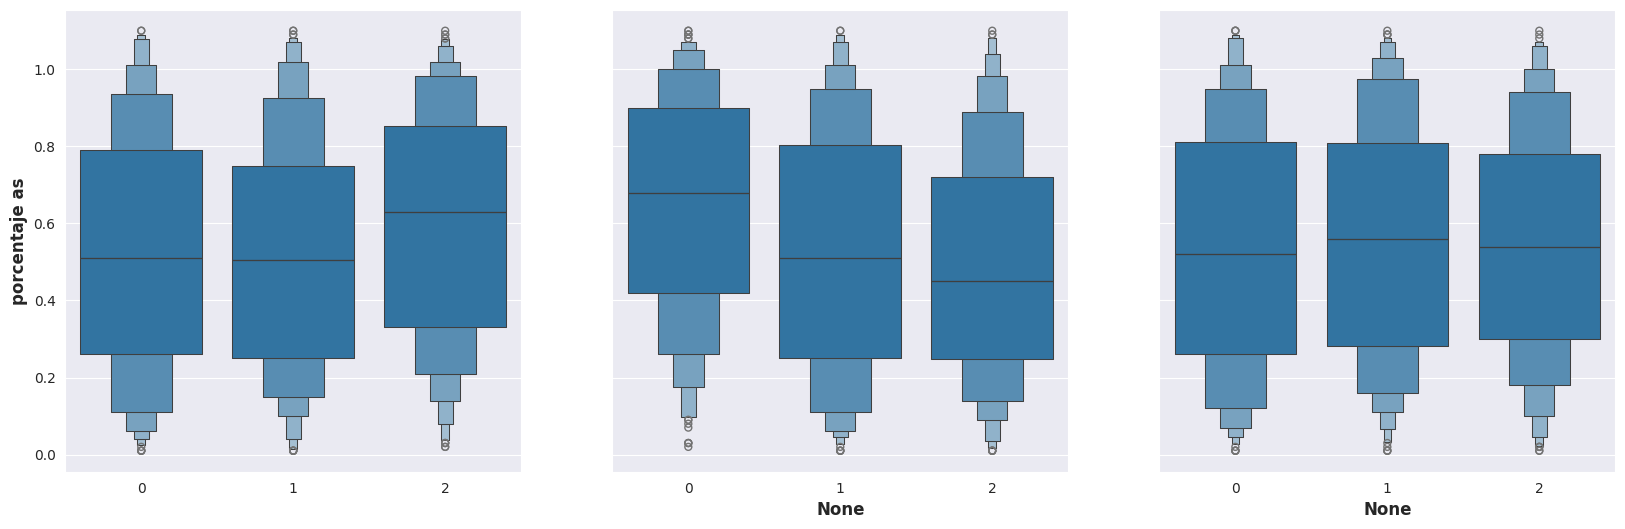

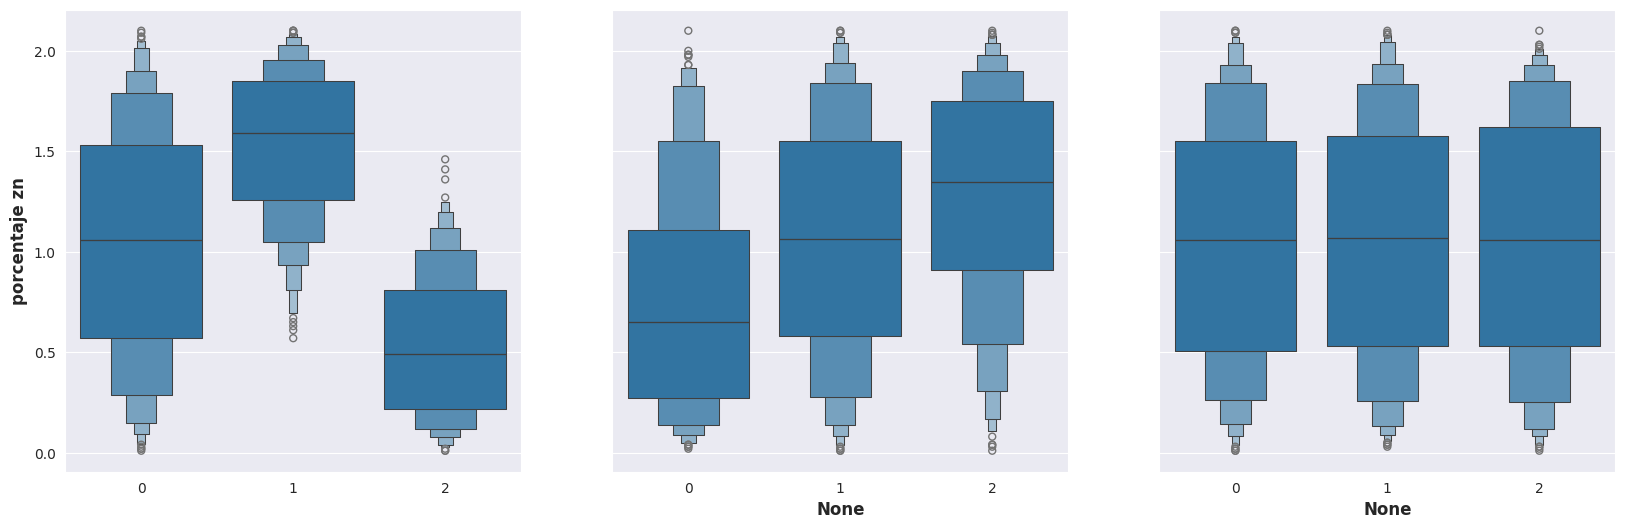

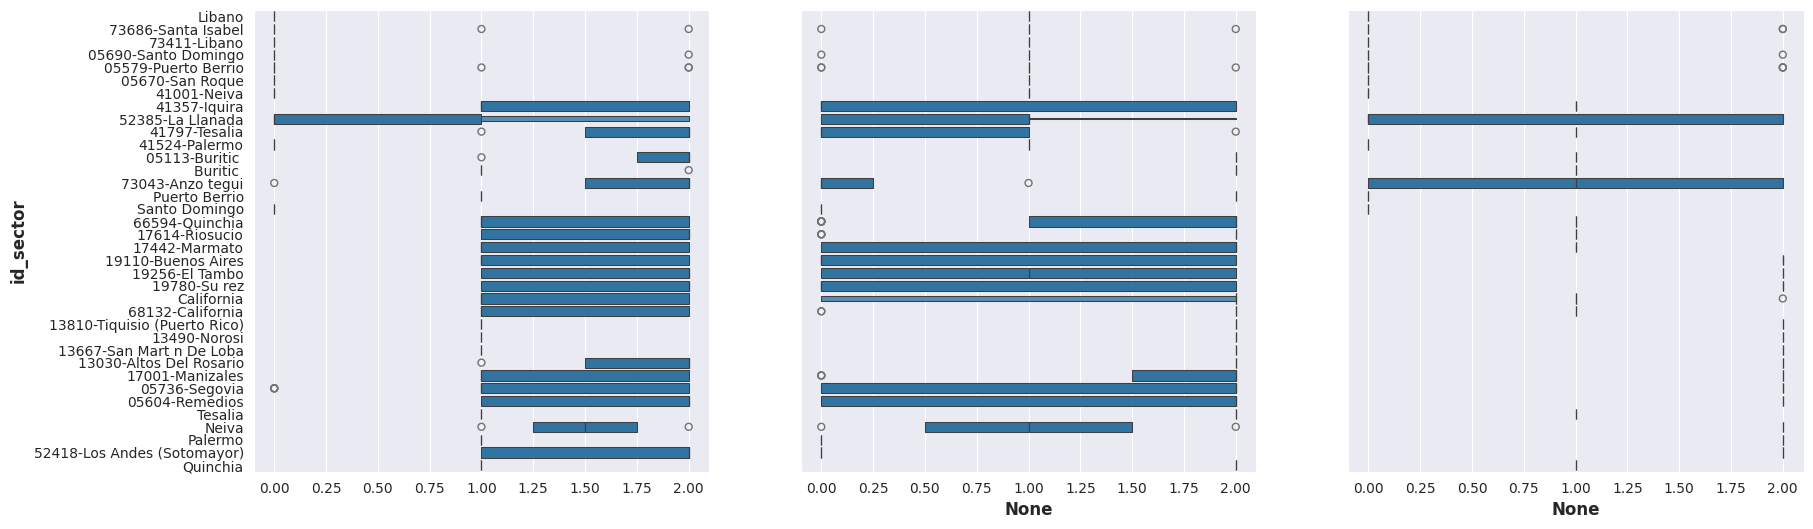

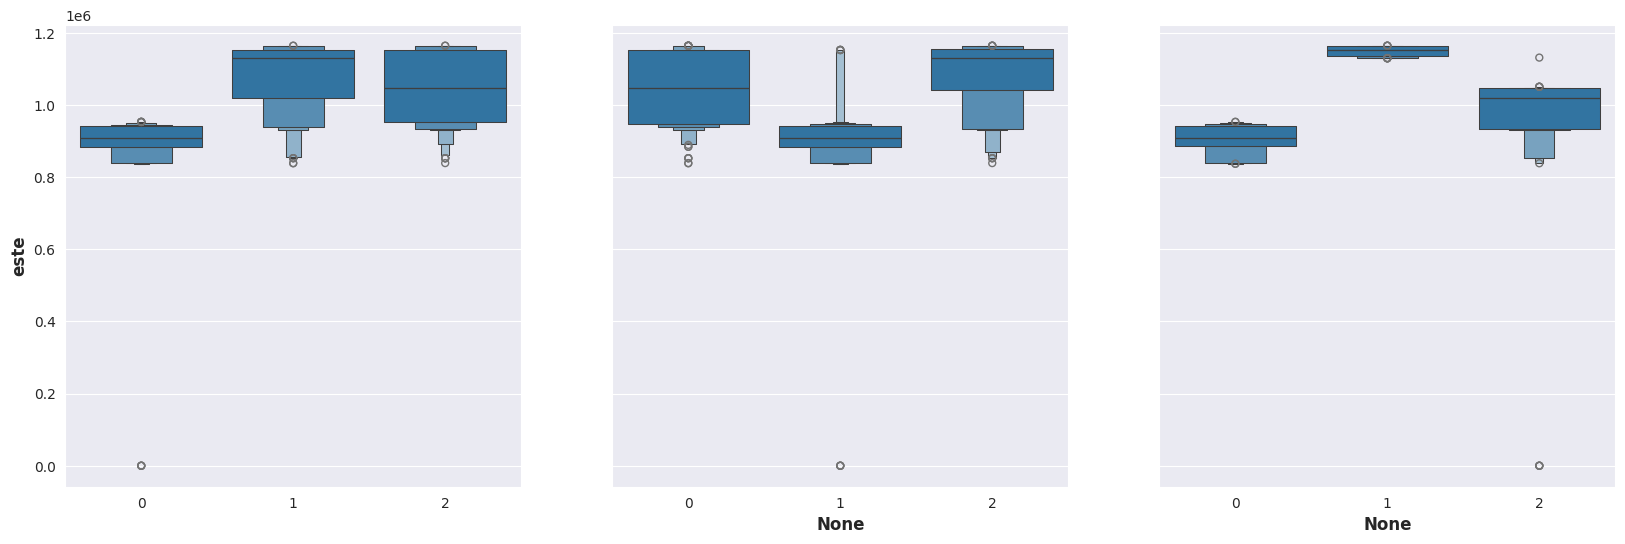

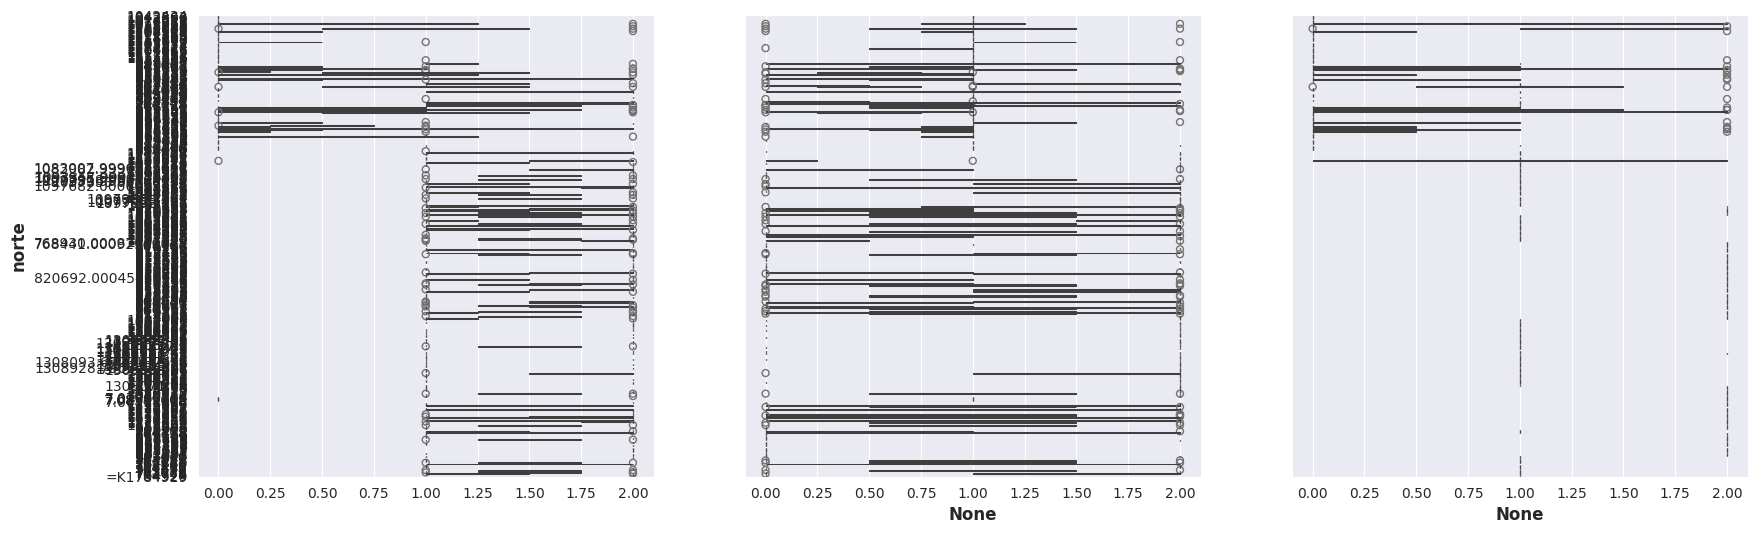

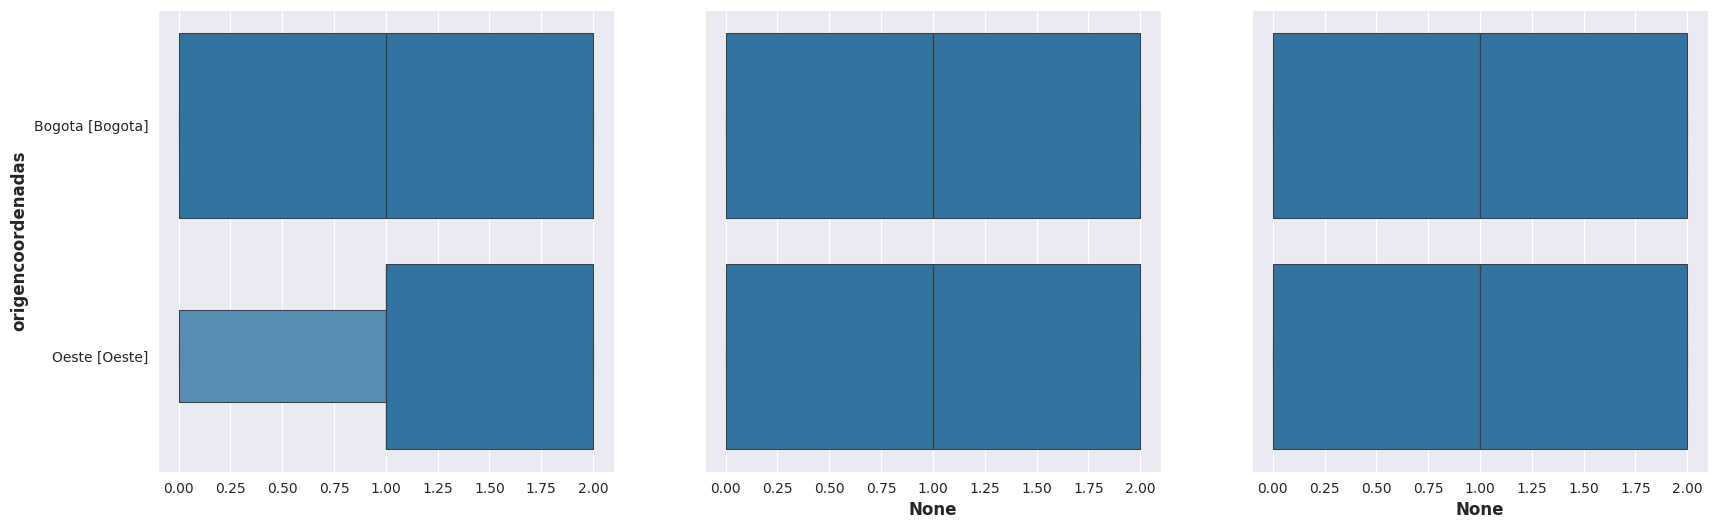

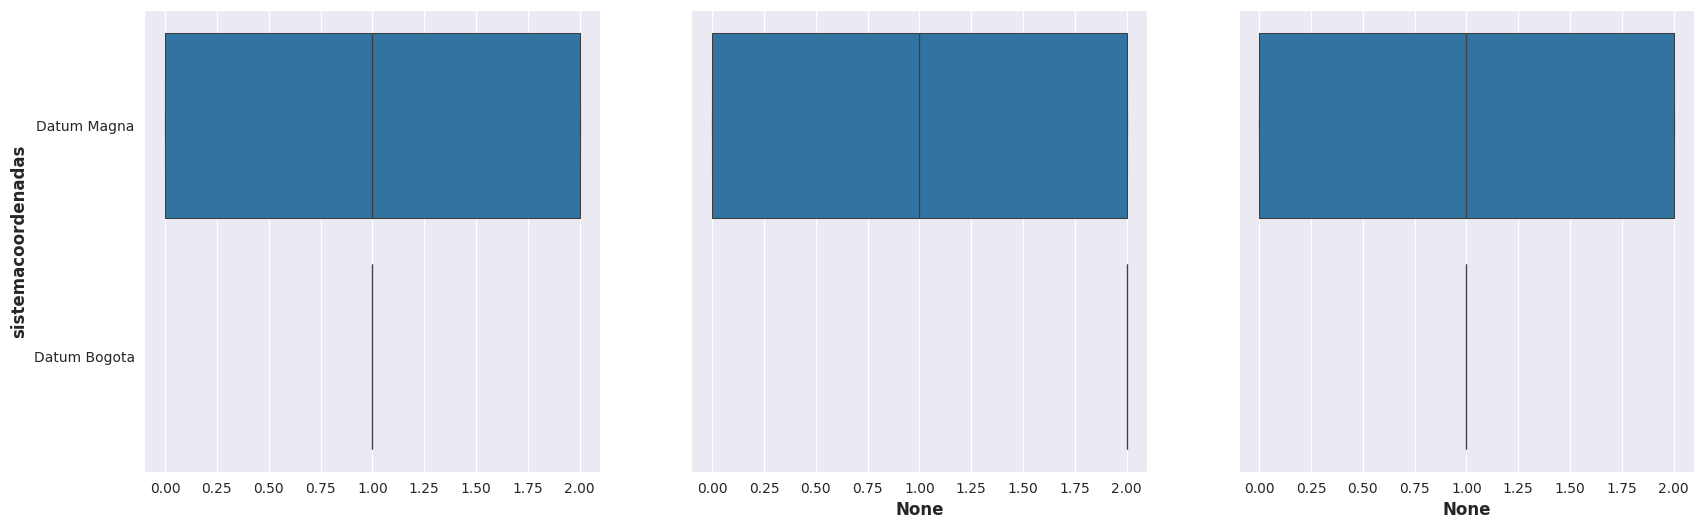

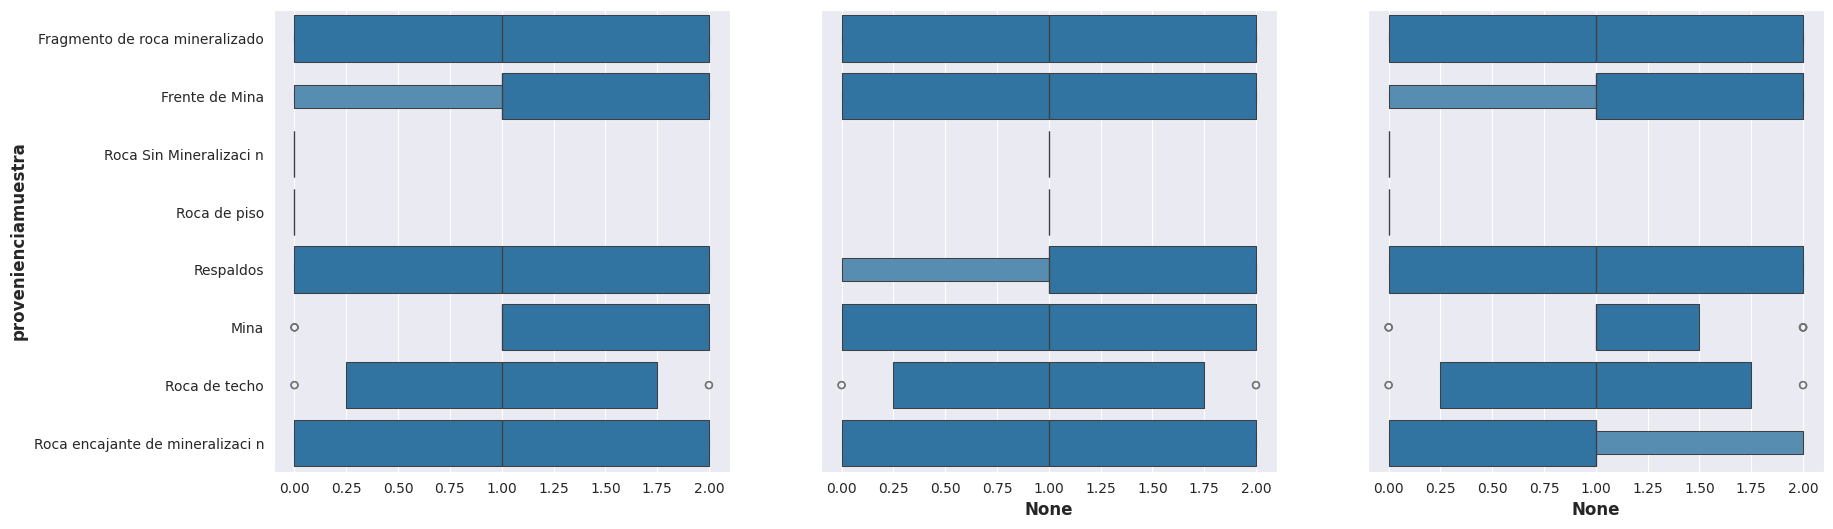

In [ ]:
for i, col in enumerate(df.columns):
    fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,6))
    sns.boxenplot(x=labels_1, y=df[col], ax=axs[0])
    sns.boxenplot(x=labels_2, y=df[col], ax=axs[1])
    sns.boxenplot(x=labels_3, y=df[col], ax=axs[2])
    if i == 0:
        axs[0].set_title("Approach 1: No prior dimensionality reduction")
        axs[1].set_title("Approach 2: PCA")
        axs[2].set_title("Approach 3: UMAP")
    plt.show()

Las gráficas muestran la distribución de los valores de Au, As y Zn para cada cluster identificado por los 3 enfoques de clustering (K-means sin reducción de dimensionalidad, K-means con PCA y K-means con UMAP).

**Análisis general:**

Los 3 enfoques producen resultados muy similares, lo que indica que los datos son relativamente fáciles de clusterizar y que la reducción de dimensionalidad no tiene un impacto significativo en los resultados.
Los clusters se diferencian principalmente en la distribución de Au. El cluster 0 tiene la mayor concentración de Au, mientras que el cluster 2 tiene la menor.
Los clusters no muestran diferencias significativas en la distribución de As y Zn.
La variabilidad de los valores dentro de cada cluster es mayor para Au que para As y Zn.

**Análisis por cluster:**

**Cluster 0:** Alta concentración de Au, concentración media de As y Zn.
**Cluster 1:** Concentración media de Au, As y Zn.
**Cluster 2:** Baja concentración de Au, concentración media de As y Zn.

**Conclusión:**

El análisis de clustering sugiere que las muestras de minerales se pueden agrupar en 3 clusters con diferentes concentraciones de Au. Los clusters no se diferencian significativamente en la concentración de As y Zn.

**Revisar cuántos puntos de datos hay en cada grupo para cada enfoque**

In [ ]:
counts_1 = pd.Series(labels_1).value_counts().sort_index()
counts_2 = pd.Series(labels_2).value_counts().sort_index()
counts_3 = pd.Series(labels_3).value_counts().sort_index()

cluster_counts = pd.DataFrame({"app_1": counts_1, "app_2": counts_2, "app_3": counts_3})

cluster_counts.index.name = "cluster_id"

cluster_counts

app_1  app_2  app_3
cluster_id                     
0             293    249    306
1             292    304    278
2             272    304    273

**Graficando las ubicaciones de las muestras en el mapa de Colombia**

In [ ]:
import folium
import pyproj
print(df['origencoordenadas'].str.strip().str.lower().unique())
# Define projections with lowercase keys and stripped spaces
proyecciones = {
    'bogota [bogota]': pyproj.Proj(init='epsg:3116'),
    'oeste [oeste]': pyproj.Proj(init='epsg:3115')
}

# Create a map centered on Colombia
mapa_colombia = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    try:
        # Get coordinates
        norte = row['norte']
        este = row['este']

        # Get projection based on coordinate origin, ensuring lowercase and stripped
        origen = row['origencoordenadas'].strip().lower()
        proyeccion = proyecciones.get(origen)

        # Convert coordinates to latitude and longitude if the projection is valid
        if proyeccion:
            longitud, latitud = proyeccion(este, norte, inverse=True)

            # Create a marker for the point with a triangle icon
            folium.Marker(
                location=[latitud, longitud],
                popup=f"ID Muestra: {row['id_muestra']}<br>Origen: {row['origencoordenadas']}<br>Sistema: {row['sistemacoordenadas']}",
                icon=folium.Icon(color='blue', icon='triangle-up', prefix='fa')
            ).add_to(mapa_colombia)
        else:
            print(f"Unknown coordinate origin in row {index}: {origen}")

    except Exception as e:
        print(f"Error in row {index}: {e}")

# Display the map
mapa_colombia

['bogota [bogota]' 'oeste [oeste]']


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Error in row 856: input must be a scalar


===> Ubicación de todas las muestras en el mapa.

In [ ]:
# Ubicación de las muestras con más alto porcentaje según el elemento
import folium
import pyproj

top_10_au = df.sort_values(by='porcentaje au', ascending=False).head(10)
top_10_as = df.sort_values(by='porcentaje as', ascending=False).head(10)
top_10_zn = df.sort_values(by='porcentaje zn', ascending=False).head(10)
top_10_au.head()
print(df['origencoordenadas'].str.strip().str.lower().unique())
# Define projections with lowercase keys and stripped spaces
proyecciones = {
    'bogota [bogota]': pyproj.Proj(init='epsg:3116'),
    'oeste [oeste]': pyproj.Proj(init='epsg:3115')
}

# Create a map centered on Colombia
mapa_colombia = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

# Iterate over the rows of the DataFrame
for index, row in top_10_au.iterrows():
    try:
        # Get coordinates
        norte = row['norte']
        este = row['este']

        # Get projection based on coordinate origin, ensuring lowercase and stripped
        origen = row['origencoordenadas'].strip().lower()
        proyeccion = proyecciones.get(origen)

        # Convert coordinates to latitude and longitude if the projection is valid
        if proyeccion:
            longitud, latitud = proyeccion(este, norte, inverse=True)

            # Create a marker for the point with a triangle icon
            folium.Marker(
                location=[latitud, longitud],
                popup=f"ID Muestra: {row['id_muestra']}<br>Porcentaje Au: {row['porcentaje au']}<br>Sistema: {row['sistemacoordenadas']}",
                icon=folium.Icon(color='yellow', icon='triangle-up', prefix='fa')
            ).add_to(mapa_colombia)
        else:
            print(f"Unknown coordinate origin in row {index}: {origen}")

    except Exception as e:
        print(f"Error in row {index}: {e}")

# Iterate over the rows of the DataFrame
for index, row in top_10_as.iterrows():
    try:
        # Get coordinates
        norte = row['norte']
        este = row['este']

        # Get projection based on coordinate origin, ensuring lowercase and stripped
        origen = row['origencoordenadas'].strip().lower()
        proyeccion = proyecciones.get(origen)

        # Convert coordinates to latitude and longitude if the projection is valid
        if proyeccion:
            longitud, latitud = proyeccion(este, norte, inverse=True)

            # Create a marker for the point with a triangle icon
            folium.Marker(
                location=[latitud, longitud],
                popup=f"ID Muestra: {row['id_muestra']}<br>Porcentaje As: {row['porcentaje as']}<br>Sistema: {row['sistemacoordenadas']}",
                icon=folium.Icon(color='blue', icon='triangle-up', prefix='fa')
            ).add_to(mapa_colombia)
        else:
            print(f"Unknown coordinate origin in row {index}: {origen}")

    except Exception as e:
        print(f"Error in row {index}: {e}")

# Iterate over the rows of the DataFrame
for index, row in top_10_zn.iterrows():
    try:
        # Get coordinates
        norte = row['norte']
        este = row['este']

        # Get projection based on coordinate origin, ensuring lowercase and stripped
        origen = row['origencoordenadas'].strip().lower()
        proyeccion = proyecciones.get(origen)

        # Convert coordinates to latitude and longitude if the projection is valid
        if proyeccion:
            longitud, latitud = proyeccion(este, norte, inverse=True)

            # Create a marker for the point with a triangle icon
            folium.Marker(
                location=[latitud, longitud],
                popup=f"ID Muestra: {row['id_muestra']}<br>Porcentaje Zn: {row['porcentaje Zn']}<br>Sistema: {row['sistemacoordenadas']}",
                icon=folium.Icon(color='green', icon='triangle-up', prefix='fa')
            ).add_to(mapa_colombia)
        else:
            print(f"Unknown coordinate origin in row {index}: {origen}")

    except Exception as e:
        print(f"Error in row {index}: {e}")

# Display the map
mapa_colombia

['bogota [bogota]' 'oeste [oeste]']
Error in row 289: 'porcentaje Zn'
Error in row 763: 'porcentaje Zn'
Error in row 482: 'porcentaje Zn'
Error in row 5: 'porcentaje Zn'
Error in row 308: 'porcentaje Zn'
Error in row 850: 'porcentaje Zn'
Error in row 240: 'porcentaje Zn'
Error in row 484: 'porcentaje Zn'
Error in row 659: 'porcentaje Zn'
Error in row 165: 'porcentaje Zn'


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-20-632c52ee6a05>:38: UserWarning: color argument of Icon should be one of: {'red', 'lightblue', 'beige', 'gray', 'lightgreen', 'green', 'purple', 'darkred', 'white', 'darkblue', 'black', 'blue', 'orange', 'darkp

In [ ]:
import folium
import pyproj

# Calculate the combined average for each row
df['promedio_combinado'] = (df['porcentaje au'] + df['porcentaje as'] + df['porcentaje zn']) / 3

# Get the top 10 samples with the highest combined average
top_10_combinado = df.sort_values(by='promedio_combinado', ascending=False).head(10)

# Define projections with lowercase keys and stripped spaces
proyecciones = {
    'bogota [bogota]': pyproj.Proj(init='epsg:3116'),
    'oeste [oeste]': pyproj.Proj(init='epsg:3115')
}

# Create a map centered on Colombia
mapa_colombia = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

# Iterate over the rows of the DataFrame
for index, row in top_10_combinado.iterrows():
    try:
        # Get coordinates
        norte = row['norte']
        este = row['este']

        # Get projection based on coordinate origin, ensuring lowercase and stripped
        origen = row['origencoordenadas'].strip().lower()
        proyeccion = proyecciones.get(origen)

        # Convert coordinates to latitude and longitude if the projection is valid
        if proyeccion:
            longitud, latitud = proyeccion(este, norte, inverse=True)

            # Create a marker for the point with a triangle icon
            folium.Marker(
                location=[latitud, longitud],
                popup=f"ID Muestra: {row['id_muestra']}<br>Promedio Combinado: {row['promedio_combinado']:.2f}<br>Origen: {row['origencoordenadas']}<br>Sistema: {row['sistemacoordenadas']}",
                icon=folium.Icon(color='red', icon='triangle-up', prefix='fa')
            ).add_to(mapa_colombia)
        else:
            print(f"Unknown coordinate origin in row {index}: {origen}")

    except Exception as e:
        print(f"Error in row {index}: {e}")

# Display the map
mapa_colombia

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


**Conclusion**

El código realiza un análisis de clustering de datos de exploración de minerales en Colombia. Los principales minerales analizados son oro (Au), arsénico (As) y zinc (Zn).

Se aplicaron tres enfoques de clustering: K-means sin reducción de dimensionalidad, K-means con PCA y K-means con UMAP. Los tres métodos produjeron resultados similares, identificando tres clusters principales de muestras de minerales.

Los clusters se diferencian principalmente por la concentración de Au, con un cluster mostrando alta concentración, otro con concentración media y el último con baja concentración. Los niveles de As y Zn no son significativos para diferenciar los clusters.

Problema que soluciona:

Este análisis permite identificar zonas con alta concentración de Au en Colombia. Esto puede ser útil para la industria minera, ya que podrían enfocar sus esfuerzos de exploración en las áreas con mayor probabilidad de encontrar oro.

Conclusión general:

El análisis de clustering es una herramienta útil para el análisis de datos geoquímicos. En este caso, permitió identificar patrones en la distribución de minerales en Colombia y podría ayudar a la industria minera a optimizar sus operaciones.